## Coding Goal: Building an AI-Enhanced, Multi-Disciplinary Trading System
Objective:
Develop a trading system that integrates machine learning, physics-based finance, quantum mechanics, and astrology to analyze and predict market trends and then execute trades without me. Slowly but surely. Algo trading kinda sorta not really. I will try to build and incorporate everything I learn from the repos of ml in finance to an actual algo bot, even before the chapters actually get there. I have built a quantum nmr pipeline in 3 months, so I am curious to see how far I can go with this if I bend the rules a bit and am creative. However I need to learn more backing in algo trading

It will have a collective of thoughts that will need to be organized into something cohesive


### Update 6/16/25
The goal is now to make something from the exercises, like an exercise and a bonus real life exercise where I can practically apply what I learned in the book. I want something that can tell me when to buy xyz and when to sell xyz on fidelity based on the stock data. Not news data or real time data besides math analytics yet, but well get there, samw with the qm and astro-integrations and fine tuning. But rn I am building a brain for trading and I am the body. but yk like a cerebrum, not a whole brain yet

### update 6/29/25
I want to be able to manually place trades, but also the algo pull source data from the ENTIRE api saying when I should buy what and sell what exactly, and how much money I should transfer or sell into it. and when it would be wise to sell, and it would be something that I would run everyday. and I would increase its abilities and shit before I automate it so that it does it by itself. I want it eventually to be able to take in all the possible data and not just what is in the portfolio. I also wanna use the portfolio i have for the upcoming exercises

In [1]:
import yfinance as yf
from trading_functions import create_individual_portfolio_charts, display_portfolio_ohlcv_heads
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


## Data

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Define the portfolio 
portfolio = {
    'czoof': 0.2,
    'FCNVX': 0.995,
    'fdig': 0.925,
    'fdkvx': 0.862,
    'feddx': 0.961,
    'ffrhx': 3.247,
    'fifnx': 0.969,
    'fitlx': 1.151,
    'flowx': 0.838,
    'fsenx': 0.326,
    'LION': 2,
    'OLLI': 0.175,
    'UNP': 0.1,
    'VZ': 0.5,
    'WPP': 0.3
}

# yfinance style (for stocks)
ticker = list(portfolio.keys())  
period = "1000d"         # Instead of 'num_bars' (or use start/end dates)
interval = "1d"          # Instead of 'timeframe'
# No 'start_pos' - uses dates instead
start_date = None  # Use None for the most recent data
end_date = None    # Use None for the most recent data

display_portfolio_ohlcv_heads(ticker, period, interval)

📊 PORTFOLIO OHLCV DATA - Individual Stock Analysis

🏢 1/15: CZOOF
--------------------------------------------------
❌ Error fetching CZOOF: name 'yf' is not defined

🏢 2/15: FCNVX
--------------------------------------------------
❌ Error fetching FCNVX: name 'yf' is not defined

🏢 3/15: FDIG
--------------------------------------------------
❌ Error fetching FDIG: name 'yf' is not defined

🏢 4/15: FDKVX
--------------------------------------------------
❌ Error fetching FDKVX: name 'yf' is not defined

🏢 5/15: FEDDX
--------------------------------------------------
❌ Error fetching FEDDX: name 'yf' is not defined

🏢 6/15: FFRHX
--------------------------------------------------
❌ Error fetching FFRHX: name 'yf' is not defined

🏢 7/15: FIFNX
--------------------------------------------------
❌ Error fetching FIFNX: name 'yf' is not defined

🏢 8/15: FITLX
--------------------------------------------------
❌ Error fetching FITLX: name 'yf' is not defined

🏢 9/15: FLOWX
----------------

# Machine Learning in finance

##  Chapter 2 (probability) Exercises into the Trading System

The goal is to adapt these theoretical exercises to support your trading system. Below are the exercises with key equations represented using KaTeX, suitable for market-related applications.

---


### Exercise 2.1: Applied Bayes’ Theorem

An accountant is 95 percent effective in detecting fraudulent accounting when it
is, in fact, present. However, the audit also yields a “false positive” result for one
percent of the non-fraudulent companies audited. If 0.1 percent of the companies
are actually fraudulent, what is the probability that a company is fraudulent given
that the audit revealed fraudulent accounting?

Bayes’ rule:
$$
P(\text{Fraud} \mid +) = \frac{P(+ \mid \text{Fraud}) \cdot P(\text{Fraud})}{P(+)}
$$

Where:
$$
P(+) = P(+ \mid \text{Fraud}) \cdot P(\text{Fraud}) + P(+ \mid \text{No Fraud}) \cdot P(\text{No Fraud})
$$

---

In [3]:
# Likelihoods (how the audit behaves)
probability_audit_flags_fraud_given_actual_fraud = 0.95  # 95% true positive rate
probability_audit_flags_fraud_given_no_fraud = 0.01      # 1% false positive rate

# Base rates (how common fraud is)
probability_company_is_actually_fraudulent = 0.001       # 0.1% of all companies
probability_company_is_not_fraudulent = 1 - probability_company_is_actually_fraudulent

# Total chance that audit returns a fraud flag, whether it's right or not
probability_audit_flags_fraud_overall = (
    probability_audit_flags_fraud_given_actual_fraud * probability_company_is_actually_fraudulent +
    probability_audit_flags_fraud_given_no_fraud * probability_company_is_not_fraudulent
)

# Bayes' theorem: what's the chance it's truly fraud *given* the audit flags it?
probability_company_is_fraudulent_given_audit_flag = (
    probability_audit_flags_fraud_given_actual_fraud * probability_company_is_actually_fraudulent
) / probability_audit_flags_fraud_overall

# Display result
print("📊 Probability that a company is actually fraudulent *given* a positive audit result:")
print(f"{probability_company_is_fraudulent_given_audit_flag:.5f} or {probability_company_is_fraudulent_given_audit_flag*100:.2f}%")


📊 Probability that a company is actually fraudulent *given* a positive audit result:
0.08684 or 8.68%


### Exercise 2.2*: FX and Equity

A currency strategist has estimated that JPY will strengthen against USD with
probability 60% if S&P 500 continues to rise. JPY will strengthen against USD
with probability 95% if S&P 500 falls or stays flat. We are in an upward trending
market at the moment, and we believe that the probability that S&P 500 will rise
is 70%. We then learn that JPY has actually strengthened against USD. Taking this
new information into account, what is the probability that S&P 500 will rise? Hint:
Recall Bayes’ rule: P (A | B) = P (B | A)
P (B) P (A).
A currency strategist estimates that:

- If the S&P 500 rises:
  $$
  P(\text{JPY strengthens} \mid \text{S\&P up}) = 0.60
  $$
- If the S&P 500 falls or is flat:
  $$
  P(\text{JPY strengthens} \mid \text{S\&P not up}) = 0.95
  $$

Given:
$$
P(\text{S\&P up}) = 0.70
$$

Upon observing JPY strengthening, use Bayes’ rule to update:
$$
P(\text{S\&P up} \mid \text{JPY strengthens}) = \frac{P(\text{JPY strengthens} \mid \text{S\&P up}) \cdot P(\text{S\&P up})}{P(\text{JPY strengthens})}
$$

---

In [4]:
# Likelihoods
probability_jpy_strengthens_given_sp500_up = 0.60      # If S&P goes up, 60% chance JPY strengthens
probability_jpy_strengthens_given_sp500_not_up = 0.95  # If S&P doesn't go up, 95% chance JPY strengthens

# Prior beliefs
probability_sp500_up = 0.70                            # 70% belief S&P will rise
probability_sp500_not_up = 1 - probability_sp500_up    # 30% belief S&P won't rise

# Total probability JPY strengthens (marginal likelihood)
probability_jpy_strengthens_overall = (
    probability_jpy_strengthens_given_sp500_up * probability_sp500_up +
    probability_jpy_strengthens_given_sp500_not_up * probability_sp500_not_up
)

# Bayes' theorem to reverse: What’s the chance S&P is rising *given* JPY strengthens?
probability_sp500_up_given_jpy_strengthens = (
    probability_jpy_strengthens_given_sp500_up * probability_sp500_up
) / probability_jpy_strengthens_overall

# Print result
print("📊 Updated probability S&P 500 is rising *given* that JPY has strengthened:")
print(f"{probability_sp500_up_given_jpy_strengthens:.5f} or {probability_sp500_up_given_jpy_strengthens*100:.2f}%")


📊 Updated probability S&P 500 is rising *given* that JPY has strengthened:
0.59574 or 59.57%


### Exercise 2.3**: Bayesian Inference in Trading

Suppose there are n conditionally independent, but not identical, Bernoulli trials
G1,...,Gn generated from the map P (Gi = 1 | X = xi) = g1(xi | θ ) with
θ ∈ [0, 1]. Show that the likelihood of G | X is given by p(G | X, θ ) = n
i=1
(g1(xi | θ ))Gi · (g0(xi | θ ))1−Gi (2.46)

and the log-likelihood of G | X is given by
ln p(G | X, θ ) = n
i=1
Giln(g1(xi | θ )) + (1 − Gi)ln(g0(xi | θ )). (2.47)
Using Bayes’ rule, write the condition probability density function of θ (the
“posterior”) given the data (X, G) in terms of the above likelihood function.

From the previous example, suppose that G = 1 corresponds to JPY strengthen-
ing against the dollar and X are the S&P 500 daily returns and now

g1(x | θ ) = θ1x>0 + (θ + 35)1x≤0. (2.48)
Starting with a neutral view on the parameter θ (i.e., θ ∈ [0, 1]), learn the
distribution of the parameter θ given that JPY strengthens against the dollar for
two of the three days and S&P 500 is observed to rise for 3 consecutive days. Hint:
You can use the Beta density function with a scaling constant (α, β)
p(θ|α, β) = (α + β − 1)!
(α − 1)!(β − 1)!

θα−1(1 − θ )β−1 = (α, β)θα−1(1 − θ )β−1
(2.49)

to evaluate the integral in the marginal density function.
If θ represents the currency analyst’s opinion of JPY strengthening against the
dollar, what is the probability that the model overestimates the analyst’s estimate?

Assume there are \( n \) conditionally independent Bernoulli trials \( G_1, \dots, G_n \), with:

$$
P(G_i = 1 \mid X = x_i) = g_1(x_i \mid \theta)
$$

Define:
$$
g_0(x_i \mid \theta) = 1 - g_1(x_i \mid \theta)
$$

Likelihood:
$$
p(G \mid X, \theta) = \prod_{i=1}^n \left(g_1(x_i \mid \theta)\right)^{G_i} \left(g_0(x_i \mid \theta)\right)^{1 - G_i}
$$

Log-likelihood:
$$
\ln p(G \mid X, \theta) = \sum_{i=1}^n \left[ G_i \ln g_1(x_i \mid \theta) + (1 - G_i) \ln g_0(x_i \mid \theta) \right]
$$

Posterior:
$$
p(\theta \mid X, G) \propto p(G \mid X, \theta) \cdot p(\theta)
$$

With:
$$
g_1(x \mid \theta) = \theta \cdot \mathbf{1}_{\{x > 0\}} + (\theta + 0.35) \cdot \mathbf{1}_{\{x \leq 0\}}
$$

And a Beta prior:
$$
p(\theta \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \cdot \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

Determine if the posterior overestimates the analyst’s view given the data.

#### Liklihood

In [5]:
def g1(x, theta):
    # If x > 0 => theta; else => theta + 0.35
    return np.where(x > 0, theta, theta + 0.35)

def g0(x, theta):
    return 1 - g1(x, theta)

def likelihood(G, X, theta):
    probs = g1(X, theta)**G * g0(X, theta)**(1 - G)
    return np.prod(probs)


#### Log Liklihood

In [6]:
def log_likelihood(G, X, theta):
    g1_vals = g1(X, theta)
    g0_vals = g0(X, theta)
    return np.sum(G * np.log(g1_vals) + (1 - G) * np.log(g0_vals))

#### Computing posterior over grid

C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\617865961.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior /= np.trapz(posterior, theta_vals)  # Normalize


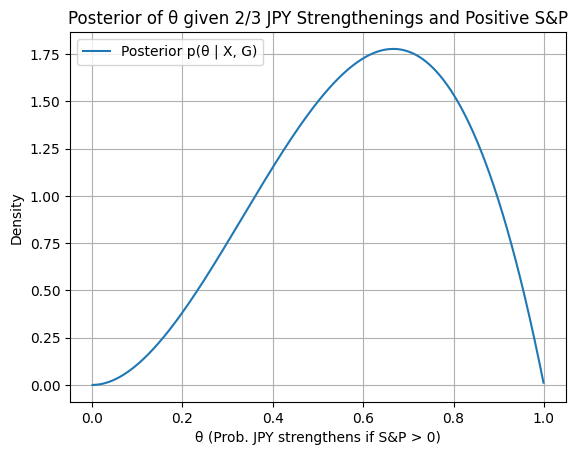

In [7]:

from scipy.stats import beta

# Observed data
X = np.array([1, 1, 1])   # All S&P 500 days are positive
G = np.array([1, 1, 0])   # JPY strengthened twice

# Evaluate posterior over theta grid
theta_vals = np.linspace(0.001, 0.999, 1000)
likelihoods = np.array([likelihood(G, X, t) for t in theta_vals])
prior = beta.pdf(theta_vals, 1, 1)  # Uniform prior
posterior = likelihoods * prior
posterior /= np.trapz(posterior, theta_vals)  # Normalize

# Plot
plt.plot(theta_vals, posterior, label="Posterior p(θ | X, G)")
plt.xlabel("θ (Prob. JPY strengthens if S&P > 0)")
plt.ylabel("Density")
plt.title("Posterior of θ given 2/3 JPY Strengthenings and Positive S&P")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
posterior_mean = np.trapz(theta_vals * posterior, theta_vals)
print(f"Posterior Mean of θ: {posterior_mean:.4f}")

# Probability model overestimates analyst’s estimate (e.g. analyst says 0.7)
prob_overestimate = np.trapz(posterior[theta_vals > 0.7], theta_vals[theta_vals > 0.7])
print(f"Probability model overestimates analyst’s 0.7 estimate: {prob_overestimate:.2%}")


Posterior Mean of θ: 0.6000
Probability model overestimates analyst’s 0.7 estimate: 34.78%


C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\326824770.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior_mean = np.trapz(theta_vals * posterior, theta_vals)
C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\326824770.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  prob_overestimate = np.trapz(posterior[theta_vals > 0.7], theta_vals[theta_vals > 0.7])



### Exercise 2.4*: Bayesian Inference in Trading (Expanded)
Suppose that you observe the following daily sequence of directional changes in the
JPY/USD exchange rate (U (up), D(down or stays flat)):
U, D, U, U, D
and the corresponding daily sequence of S&P 500 returns is
-0.05, 0.01, -0.01, -0.02, 0.03
You propose the following probability model to explain the behavior of JPY
against USD given the directional changes in S&P 500 returns: Let G denote a
Bernoulli R.V., where G = 1 corresponds to JPY strengthening against the dollar
and r are the S&P 500 daily returns. All observations of G are conditionally
independent (but *not* identical) so that the likelihood is

p(G | r, θ ) = n
i=1
p(G = Gi | r = ri,θ)
where

p(Gi = 1 | r = ri,θ) =

θu, ri > 0
θd , ri ≤ 0.

Compute the full expression for the likelihood that the data was generated by this
model.

Given:
- JPY/USD directions: U, D, U, U, D
- S&P 500 returns: -0.05, 0.01, -0.01, -0.02, 0.03

Propose a model:
$$
p(G \mid r, \theta) = \prod_{i=1}^n p(G_i \mid r_i, \theta)
$$

Where:
$$
p(G_i = 1 \mid r_i, \theta) =
\begin{cases}
\theta_u, & r_i > 0 \\
\theta_d, & r_i \leq 0
\end{cases}
$$

Write out the likelihood explicitly for the dataset.

---

In [9]:
G = np.array([1, 0, 1, 1, 0])  # JPY strengthened twice
r = np.array([-0.05, 0.01, -0.01, -0.02, 0.03])  # S&P returns

In [10]:
import numpy as np

def likelihood_jpy_model(G, r, theta_u, theta_d):
    """
    G: array-like, 1 if JPY strengthened, 0 otherwise
    r: array-like, S&P 500 returns
    theta_u: P(JPY up | r > 0)
    theta_d: P(JPY up | r <= 0)
    """
    probs = np.where(r > 0, theta_u, theta_d)
    likelihood = np.prod(probs**G * (1 - probs)**(1 - G))
    return likelihood

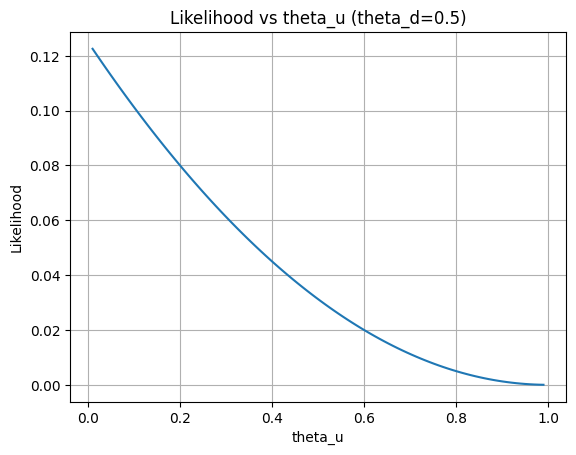

In [11]:
# Plot likelihood as a function of theta_u (fix theta_d)
theta_u_vals = np.linspace(0.01, 0.99, 100)
theta_d = 0.5  # example fixed value
likelihoods = [likelihood_jpy_model(G, r, tu, theta_d) for tu in theta_u_vals]

plt.plot(theta_u_vals, likelihoods)
plt.xlabel("theta_u")
plt.ylabel("Likelihood")
plt.title("Likelihood vs theta_u (theta_d=0.5)")
plt.grid(True)
plt.show()

### Exercise 2.5: Model Comparison
Suppose you observe the following daily sequence of direction changes in the stock
market (U (up), D(down)):

U, D, U, U, D, D, D, D, U, U, U, U, U, U, U, D, U, D, U, D,
U, D, D, D, D, U, U, D, U, D, U, U, U, D, U, D, D, D, U, U,
D, D, D, U, D, U, D, U, D, D

You compare two models for explaining its behavior. The first model, M1, assumes
that the probability of an upward movement is fixed to 0.5 and the data is i.i.d.
The second model, M2, also assumes the data is i.i.d. but that the probability of
an upward movement is set to an unknown θ ∈  = (0, 1) with a uniform prior
on θ : p(θ|M2) = 1. For simplicity, we additionally choose a uniform model prior
p(M1) = p(M2).
Compute the model evidence for each model.
Compute the Bayes’ factor and indicate which model should we prefer in light
of this data?


Two models for market movement:

- **Model M1**: $P(\text{up}) = 0.5$
- **Model M2**: $P(\text{up}) = \theta$, with $\theta \sim \text{Uniform}(0,1)$



Assume equal priors:
$$
p(M_1) = p(M_2)
$$

Compute:

1. Model evidences:
- $p(\text{data} \mid M_1)$  
- $p(\text{data} \mid M_2)$


2. Bayes factor:
   $$
   \text{BF} = \frac{p(\text{data} \mid M_2)}{p(\text{data} \mid M_1)}
   $$

3. Choose the preferred model based on BF.

---

#### model 1 with fixed probability of 50/50

In [12]:
import math

# Number of observed days (trials)
number_of_days = 50

# Number of days the market moved up
number_of_up_days = 25

# Under Model 1: Probability of up movement is fixed at 0.5 for each day
# The likelihood of observing exactly this sequence (25 up, 25 down in 50 days)
probability_of_data_given_model1 = math.comb(number_of_days, number_of_up_days) * (0.5 ** number_of_days)

print(f"Probability of observing {number_of_up_days} days up within a span of {number_of_days} days Under this model is: {probability_of_data_given_model1 * 100:.5f}%")

Probability of observing 25 days up within a span of 50 days Under this model is: 11.22752%


#### Model 2 unknown probability where you have to integrate across all possible theta values (0-1)

**DIVE DEEPER INTO THIS ONE BC i DONT FULLY GET IT**

This makes a model of 25 days up and 25 down in exactly 50 days, and alpha and beta help make it uniform, like with the wavefunction thing. Then it computes the liklihood that it will happen, and that should be a relatively small number because the liklihood of something happening in this exact sequence should be pretty small

In [13]:
import math

# For Model 2: Probability of up movement is unknown (theta), with a uniform prior on theta
# The evidence for this model is the Beta function B(alpha, beta), where:
#   alpha = number of up days + 1
#   beta = number of down days + 1
#+1 # to account for the uniform prior which assumes all probabilities are equally likely
number_of_up_days = 25
number_of_down_days = 25
alpha = number_of_up_days + 1
beta = number_of_down_days + 1

# Compute the marginal likelihood (model evidence) for Model 2
model2_evidence = math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

print(
    f"Under Model 2 (unknown up probability, uniform prior), the probability of observing exactly {number_of_up_days} up days and {number_of_down_days} down days in {number_of_up_days + number_of_down_days} days is: {model2_evidence}"
)

Under Model 2 (unknown up probability, uniform prior), the probability of observing exactly 25 up days and 25 down days in 50 days is: 1.5511232553820801e-16



### Exercise 2.6: Bayesian Prediction and Updating

Using the preferred model from Exercise 2.5:

- Predict the probability of an upward movement.
- Update the posterior with new data.
- Recompute the predictive probability.

Clearly state all assumptions.

---

Using Bayesian prediction, predict the probability of an upward movement given the best model and data in Exercise 2.5.

Suppose now that you observe the following new daily sequence of direction changes in the stock market (U (up), D(down)):

D, U, D, D, D, D, U, D, U, D, U, D, D, D, U, U, D, U, D, D, D,
U, U, D, D, D, U, D, U, D, U, D, D, D, U, D, U, D, U, D, D, D,
D, U, U, D, U, D, U, U

Using the best model from Exercise 2.5, compute the new posterior distribution function based on the new data and the data in the previous question and predict the probability of an upward price movement given all data. State all modeling
assumptions clearly.

In [14]:
#To test which model is best you compute the bayes factor: if its less that 1 then model 1 is better if more than 1 then model 2 is better
bayes_factor = model2_evidence / probability_of_data_given_model1
print(bayes_factor)

#SINCE THAT the number is less than 1 and so small we can say this is strongly preferred

1.3815371810561568e-15


This takes in a prior (the old market data ) and then adds data to it's frame of refernce and from there it is able to make a prediction of something

In [15]:
# ---- STEP 1: Historical Data ----
# These are the counts from previous market observations
previous_up_days = 25
previous_down_days = 25

# ---- STEP 2: New Market Data ----
# Daily movement sequence: 'U' means the market went up, 'D' means it went down
new_market_movements = "D, U, D, D, D, D, U, D, U, D, U, D, D, D, U, U, D, U, D, D, D, U, U, D, D, D, U, D, U, D, U, D, D, D, U, D, U, D, U, D, D, D, D, U, U, D, U, D, U, U"

# Convert string to list and count 'U' and 'D' thats literally all this does
cleaned_movements = new_market_movements.replace(" ", "").split(",")
new_up_days = cleaned_movements.count('U')
new_down_days = cleaned_movements.count('D')

# ---- STEP 3: Combine Old and New Data ----
total_up_days_observed = previous_up_days + new_up_days
total_down_days_observed = previous_down_days + new_down_days

# ---- STEP 4: Bayesian Updating ----
# Assume a uniform Beta(1,1) prior: no strong beliefs before seeing the data
# Posterior becomes Beta(1 + total_ups, 1 + total_downs)
posterior_alpha = total_up_days_observed + 1
posterior_beta = total_down_days_observed + 1

# Predictive probability of next day being an "up" day is the mean of the Beta distribution
probability_next_day_is_up = posterior_alpha / (posterior_alpha + posterior_beta)

# ---- STEP 5: Print Results ----
print(f"🟢 Total Up Days Observed: {total_up_days_observed}")
print(f"🔴 Total Down Days Observed: {total_down_days_observed}")
print(f"📈 Predicted Probability of an Up Day Tomorrow: {probability_next_day_is_up * 100:.5f}%")


🟢 Total Up Days Observed: 45
🔴 Total Down Days Observed: 55
📈 Predicted Probability of an Up Day Tomorrow: 45.09804%


### Exercise 2.7: Logistic Regression is Naive Bayes

Suppose that G and X ∈ {0, 1}p are Bernoulli random variables and the Xis are
mutually independent given G—that is, P [X | G] = $p

i=1 P [Xi | G]. Given a
naive Bayes’ classifier P [G | X], show that the following logistic regression model
produces equivalent output if the weights are w0 = log
P [G]
P [Gc]
+
p
i=1
log
P [Xi = 0 ∈ G]
P [Xi = 0 ∈ Gc]

wi = log
P [Xi = 1 ∈ G]
P [Xi = 1 ∈ Gc]
·
P [Xi = 0 ∈ Gc]
P [Xi = 0 ∈ G]

, i = 1,... , p.

Assume $G$ and $X \in \{0, 1\}^p$ are Bernoulli with:

$$
P(X \mid G) = \prod_{i=1}^p P(X_i \mid G)
$$

Show that Naive Bayes yields a logistic regression with weights:

**Bias term**:

$$
w_0 = \log\frac{P(G)}{P(G^c)} + \sum_{i=1}^p \log\frac{P(X_i = 0 \mid G)}{P(X_i = 0 \mid G^c)}
$$

**Feature weights**:

$$
w_i = \log\frac{P(X_i = 1 \mid G)}{P(X_i = 1 \mid G^c)} \quad \text{for } i = 1, \dots, p
$$


In [16]:
import numpy as np

# === WHAT IS A CLASS? ===
# A "class" is a category the model tries to predict. Here we imagine:
#   - Class = 1 → the market will go UP
#   - Class = 0 → the market will go DOWN

# Our prior belief (before seeing features) is that the market goes up 60% of the time.
prob_market_up = 0.6
prob_market_down = 1 - prob_market_up  # So, 40% chance the market goes down

# === WHAT IS A FEATURE? ===
# A feature is any yes/no signal that gives us clues about what class to predict.
# Each feature is binary (0 or 1), meaning it’s either False or True.

# Example meanings:
#   - Feature 0: "Was yesterday a green candle?" (0 = no, 1 = yes)
#   - Feature 1: "Did trading volume increase?" (0 = no, 1 = yes)
#   - Feature 2: "Is it the first day of the month?" (0 = no, 1 = yes)

# These are the **observed probabilities** from our training data, showing how each feature behaves in each class.

# Feature behavior when the market went UP
#this is like saying feature 0 has a 70 percent liklihood of making the market go down and a 30 percent chance of going up. 
#this is basically just a combo tensor state product core probability thing
feature_probs_given_market_up = {
    0: {0: 0.7, 1: 0.3},  # e.g. Feature 0 was 0 in 70% of up days
    1: {0: 0.6, 1: 0.4},
    2: {0: 0.5, 1: 0.5}
}

# Feature behavior when the market went DOWN
feature_probs_given_market_down = {
    0: {0: 0.4, 1: 0.6},  # e.g. Feature 0 was 1 in 60% of down days
    1: {0: 0.5, 1: 0.5},
    2: {0: 0.6, 1: 0.4}
}

# === STEP 1: Calculate the Bias Term (Intercept) ===
# This is the "default push" toward predicting UP before considering any features.
# Think of it as the model's baseline belief that the market will go up.
#like in a coin flip youd say the bias is 0.5 because you have no prior knowledge of the coin being biased and 0.5 would be our intercept

# Start with prior odds of market up vs. market down
bias_log_odds = np.log(prob_market_up / prob_market_down)

# Adjust the bias by adding in the odds of seeing 0 for each feature (the assumed default state)
#I actually dont get this part but I think its just saying that if the market is up then the features are more likely to be 0 than 1
# This is like saying "if the market is up, how much more likely is it that feature 0 is 0 vs. if the market is down?"
#it says if the market is up then feature 0 (which is context for the system) is more likely to be 0 (aka false) than 1 (aka true)
# We do this for each feature, accumulating the log odds.
#the bias log odds is just the log of the ratio of the probabilities of the market being up vs down without any of the features
for feature_index in feature_probs_given_market_up:
    prob_0_if_up = feature_probs_given_market_up[feature_index][0]
    prob_0_if_down = feature_probs_given_market_down[feature_index][0]
    bias_log_odds += np.log(prob_0_if_up / prob_0_if_down)

# === STEP 2: Calculate Feature Weights ===
# These are the multipliers for each feature in the logistic regression model.
# Each weight tells you how strongly flipping a feature from 0 to 1 shifts the odds toward UP or DOWN.

feature_weights = []

for feature_index in feature_probs_given_market_up:
    # Grab all the probabilities we need for this feature
    #this is saying that the probability of feature 1 is blank percent likely to be true/false if the market is up or down
    prob_1_if_up = feature_probs_given_market_up[feature_index][1]
    prob_1_if_down = feature_probs_given_market_down[feature_index][1]
    prob_0_if_up = feature_probs_given_market_up[feature_index][0]
    prob_0_if_down = feature_probs_given_market_down[feature_index][0]

    # Compute the weight using log-odds ratio from Naive Bayes theory
    # It captures the evidence from this feature being 1 instead of 0
    # This is like saying "if the market is up, how much more likely is it that feature X is 1 vs. if the market is down?"
    feature_log_odds_weight = np.log(
        (prob_1_if_up / prob_1_if_down) *
        (prob_0_if_down / prob_0_if_up)
    )
#.append is to add the feature weight to the list
    feature_weights.append(feature_log_odds_weight)

# === STEP 3: Output the Results ===
# These weights can be plugged into the logistic regression formula to compute:
# P(market will go up | features)

print(f"📊 Bias (Intercept on graph/the odds without the features) Term w₀ : {bias_log_odds:.4f}")
for i, weight in enumerate(feature_weights):
    print(f"📈 Liklihood Feature X_{i} (w_{i}) is true: {weight * 100:.4f}%")
#the liklihood feature percentages is just like saying that if this thing was true (the market being up) then the feature is that likely to also be true
# so output 1 is saying that if the market was up given our prior then feature 0 is -125.2763% likely to be true
# This means that if the market is up, feature 0 is actually less likely to be true, which is interesting!

📊 Bias (Intercept on graph/the odds without the features) Term w₀ : 0.9651
📈 Liklihood Feature X_0 (w_0) is true: -125.2763%
📈 Liklihood Feature X_1 (w_1) is true: -40.5465%
📈 Liklihood Feature X_2 (w_2) is true: 40.5465%


### Exercise 2.8**: Restricted Boltzmann Machines

Consider a probabilistic model with two types of binary variables: visible binary
stochastic units v ∈ {0, 1}

D and hidden binary stochastic units h ∈ {0, 1}
F , where D
and F are the number of visible and hidden units, respectively. The joint probability
density to observe their values is given by the exponential distribution

p(v, h) = 1
Z exp (−E(v, h)), Z = 
v,h
exp (−E(v, h))

and where the energy E(v, h) of the state {v, h} is
E(v, h) = −vT Wh − bT v − aT h = −
D
i=1

F
j=1
Wij vihj −
D
i=1
bivi −
F
j=1
ajhj ,
with model parameters a, b, W. This probabilistic model is called the restricted
Boltzmann machine. Show that conditional probabilities for visible and hidden
nodes are given by the sigmoid function σ (x) = 1/(1 + e−x ):
P [vi = 1 | h] = σ
⎛
⎝
j
Wijhj + bi
⎞
⎠ , P [hi = 1 | v] = σ
⎛
⎝
j
Wij vj + ai
⎞

Define:
- Visible binary units: \( v \in \{0,1\}^D \)
- Hidden binary units: \( h \in \{0,1\}^F \)

Joint distribution:
$$
p(v, h) = \frac{1}{Z} \exp\left( -E(v, h) \right), \quad Z = \sum_{v, h} \exp\left( -E(v, h) \right)
$$

Energy function:
$$
E(v, h) = -v^\top W h - b^\top v - a^\top h = -\sum_{i=1}^D \sum_{j=1}^F W_{ij} v_i h_j - \sum_{i=1}^D b_i v_i - \sum_{j=1}^F a_j h_j
$$

Explain how this model applies to learning latent factors in asset price movements.


In [17]:
import numpy as np

# === Restricted Boltzmann Machine (RBM) for Asset Price Movements ===
# Think of this as a model that tries to understand *why* assets move together,
# by guessing the presence of hidden "market moods" or "regimes" (latent factors).

# === DEFINITIONS ===

# Number of assets we're modeling — e.g., different stocks or crypto coins
number_of_assets = 6  # This is D in the math

# Number of hidden latent factors — unobserved drivers like "fear", "tech bubble", "oil panic", etc.
number_of_hidden_factors = 3  # This is F in the math

# === MODEL PARAMETERS ===

# likelihoods_matrix[i][j] means:
# "How strongly is asset i influenced by hidden factor j?"
np.random.seed(0)  # So we get repeatable results
likelihoods_matrix = np.random.normal(loc=0.0, scale=1.0, size=(number_of_assets, number_of_hidden_factors))

# Bias for each asset: how likely is asset i to go up on its own (before considering hidden factors)
bias_for_each_asset = np.random.normal(loc=0.0, scale=0.5, size=number_of_assets)

# Bias for each hidden factor: how likely is it that factor j is *just active anyway*,
# even if we don’t observe any asset movement.
# This models the factor’s independent tendency to be true (like background pressure).
bias_for_each_hidden_factor = np.random.normal(loc=0.0, scale=0.5, size=number_of_hidden_factors)

# === STEP 1: Simulate a random hidden state ===
# This is a latent market condition we don't observe directly
# Each entry = 1 (factor is active) or 0 (not active)
hidden_factors_active_or_not = np.random.binomial(n=1, p=0.5, size=number_of_hidden_factors)

# === STEP 2: Compute asset probabilities given this hidden state ===
# This answers: "If these hidden forces are active, how likely is each asset to go up?"

# For each asset: weighted sum of active hidden factors + that asset’s bias
total_input_for_each_asset = likelihoods_matrix @ hidden_factors_active_or_not + bias_for_each_asset

# Apply sigmoid to turn each total input into a probability between 0 and 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probability_of_each_asset_going_up_given_hidden_state = sigmoid(total_input_for_each_asset)

# Now simulate whether each asset actually goes up (1) or not (0)
observed_asset_movements = np.random.binomial(n=1, p=probability_of_each_asset_going_up_given_hidden_state)

# === STEP 3: Infer hidden factors given observed asset movements ===
# This is the reverse direction: "Looking at the market today, what latent regime was likely active?"

total_input_for_each_hidden_factor = likelihoods_matrix.T @ observed_asset_movements + bias_for_each_hidden_factor
probability_of_each_hidden_factor_active_given_visible_assets = sigmoid(total_input_for_each_hidden_factor)

# === FINAL OUTPUT ===
print("🎭 Hidden Factors (Active = 1):", hidden_factors_active_or_not)
print("📈 Percentage of liklihood each asset goes UP given hidden factors:", np.round(probability_of_each_asset_going_up_given_hidden_state * 100, 3))
print("✅ Simulated asset movements (1 = up, 0 = down):", observed_asset_movements)
print("🔍 Percentage liklihood that each hidden factor was active given asset behavior:", np.round(probability_of_each_hidden_factor_active_given_visible_assets * 100, 3))


🎭 Hidden Factors (Active = 1): [1 1 1]
📈 Percentage of liklihood each asset goes UP given hidden factors: [96.441 93.727 35.871 91.179 85.306 77.756]
✅ Simulated asset movements (1 = up, 0 = down): [1 1 0 1 1 1]
🔍 Percentage liklihood that each hidden factor was active given asset behavior: [99.87  96.444 84.778]


### Real World application
Now that Ik basic bayesian vs frequist try to adapt the exercises onto real market data. I wanna get market data, look at the hidden factors of the stock, use bayesian inference and something from the bernoulli shits. 
Then ofc visualize it. 

In [18]:
def analyze_volatility_regimes(ticker_list, period, interval, window=10):
    """
    For each ticker, computes rolling volatility, splits into high/low regimes,
    estimates P(up | high/low volatility) using Bayesian inference, and plots histogram.
    great for understanding how volatility affects market movements. and really useful for trading strategies.
    bc it helps you see how often the market goes up or down when volatility is high or low.
    """
    import yfinance as yf
    import matplotlib.pyplot as plt
    import numpy as np

    ticker_upper = [t.upper() for t in ticker_list]
    data = yf.download(ticker_upper, period=period, interval=interval, group_by='ticker')

    for symbol in ticker_upper:
        print(f"\n=== {symbol} ===")
        df = data[symbol].copy().dropna()
        if df.empty:
            print("No data for this ticker.")
            continue

        df['DailyReturn'] = df['Close'].pct_change()
        df = df.dropna()
        df['RollingVolatility'] = df['DailyReturn'].rolling(window=window).std()
        median_volatility_value = df['RollingVolatility'].median()
        df['IsHighVolatility'] = (df['RollingVolatility'] > median_volatility_value).astype(int)
        df['IsUpDay'] = (df['DailyReturn'] > 0).astype(int)

        up_days_when_high_volatility = df[df['IsHighVolatility'] == 1]['IsUpDay']
        up_days_when_low_volatility= df[df['IsHighVolatility'] == 0]['IsUpDay']

        # Bayesian inference with Beta(1,1) prior
        up_high_volatility = up_days_when_high_volatility.sum() + 1
        down_high_volatility = len(up_days_when_high_volatility) - up_days_when_high_volatility.sum() + 1
        up_low_volatility = up_days_when_low_volatility.sum() + 1
        down_low_volatility = len(up_days_when_low_volatility) - up_days_when_low_volatility.sum() + 1

        probability_up_with_high_volatility = up_high_volatility / (up_high_volatility + down_high_volatility)
        probability_up_with_low_volatility = up_low_volatility / (up_low_volatility + down_low_volatility)

        print(f"P(up | high volatility): {probability_up_with_high_volatility:.2%}")
        print(f"P(up | low volatility): {probability_up_with_low_volatility:.2%}")

        plt.hist(df['RollingVolatility'].dropna(), bins=30, alpha=0.5, label='Volatility')
        plt.axvline(median_volatility_value, color='red', linestyle='--', label='Median Volatility')
        plt.xlabel('Volatility (std. dev. of returns)')
        plt.ylabel('Frequency (number of days)')
        plt.legend()
        plt.title(f'Volatility Regimes for {symbol}')
        plt.show()

## Chapter 3 (Bayesian Regression and Gaussian Processes) into the trading system
The goal is to apadt these theoretical exercises to create a trading system in the end
make your own gp training models. and tests
fit a gp to a real training data from a real stock
create youe own gaussian process regressor and predict their values
Size a fake investment

Hyperparameters selection. CHose the things that optoimize 

Rbf kernel. pick a model that will agree with the data without even seeing the data. The normal distribution 

try to short a put and call with real data

get a gaussian vega and black scholes vega and compare them using real data

get gp error for vega measurements to see how accuratelt th=he sensitivity is

Use the heston model to make calls and puts on a real database

find a way to automate black scholes parameters with any given stock

Make a multi-reponse gp model and ofc fit it, with real world data and evaluate the covarience of the model.

create a parameterized linear regression under gaussian noise with real data

Create a CVA using BS

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import yfinance as yf
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import scipy.stats as st
import math

In [20]:
def bsformula(cp, s, k, rf, t, v, div):
        """ Price an option using the Black-Scholes model.
        cp: +1/-1 for call/put
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        div: dividend
        """

        d1 = (np.log(s/k)+(rf-div+0.5*v*v)*t)/(v*np.sqrt(t))
        d2 = d1 - v*np.sqrt(t)

        optprice = (cp*s*np.exp(-div*t)*st.norm.cdf(cp*d1)) - (cp*k*np.exp(-rf*t)*st.norm.cdf(cp*d2))
        delta = cp*st.norm.cdf(cp*d1)
        vega  = s*np.sqrt(t)*st.norm.pdf(d1)
        return optprice, delta, vega


if __name__ == "__main__":
    ex = bsformula(-1, 100.0, 110.0, 0.05, 2.5, 0.4, 0.0)
    price, delta, vega = ex
    print("┌───────────────────────────────┐")
    print("│ Black-Scholes Option Results  │")
    print("├─────────────┬─────────────────┤")
    print(f"│ Option Price│ {price:12.4f}    │")
    print(f"│ Delta       │ {delta:12.4f}    │")
    print(f"│ Vega        │ {vega:12.4f}    │")
    print("└─────────────┴─────────────────┘")

┌───────────────────────────────┐
│ Black-Scholes Option Results  │
├─────────────┬─────────────────┤
│ Option Price│      23.0174    │
│ Delta       │      -0.3582    │
│ Vega        │      59.0527    │
└─────────────┴─────────────────┘


In [21]:
""" Simulate dynamics under GBM """ 
def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S

### 📈 Exercise 3.1: Posterior Distribution of Bayesian Linear Regression

We consider a **Bayesian linear regression model** where:

$$
y_i = \theta^T X + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma_n^2), \quad \theta \sim \mathcal{N}(\mu, \Sigma)
$$

We aim to show that the posterior distribution over parameters $\theta$ given the data $D = \{X, y\}$ is:

$$
\theta \mid D \sim \mathcal{N}(\mu_{\text{post}}, \Sigma_{\text{post}})
$$

with the posterior moments:

$$
A = \Sigma^{-1} + \frac{1}{\sigma_n^2} X^T X
$$

$$
\mu_{\text{post}} = A^{-1} \left( \Sigma^{-1} \mu + \frac{1}{\sigma_n^2} X^T y \right)
$$

$$
\Sigma_{\text{post}} = A^{-1}
$$

---

### 🧠 Intuition

- $\mu_{\text{post}}$: the **posterior mean**, combining your prior belief and data.
- $\Sigma_{\text{post}}$: the **posterior covariance**, showing how confident you are in the learned weights.

---

### 💡 Bonus: Why This Matters for Trading

- **Posterior mean** can help forecast *returns*, *volatility*, or *option prices*.
- **Posterior covariance** gives a mathematical way to express *confidence*, useful for risk-adjusted trades.
- The model is **online updateable**, meaning you can adapt to market changes in real time.


In [22]:
def update_beliefs_with_data(features, targets, prior_beliefs, prior_uncertainty, data_noise_level):
    """
    Updates prior beliefs about model parameters using Bayesian Linear Regression.

    Arguments:
    - features: Matrix of input data (n_samples x n_features)
    - targets: Vector of observed outcomes (length n_samples)
    - prior_beliefs: Our initial guess for the model parameters (length n_features)
    - prior_uncertainty: How uncertain we are about those initial guesses (matrix)
    - data_noise_level: Variance in the observed data (scalar, e.g., market noise)

    Returns:
    - updated_beliefs: New expected values for the model parameters
    - updated_uncertainty: New uncertainty (covariance) about the parameters
    """
    # Ensure all inputs have the correct shape
    features = np.atleast_2d(features)
    targets = np.atleast_1d(targets)
    prior_beliefs = np.atleast_1d(prior_beliefs)

    # Invert prior uncertainty to express it in "precision" (confidence)
    prior_precision = np.linalg.inv(prior_uncertainty)

    # Combine prior confidence with the data’s information content
    total_precision = prior_precision + (1 / data_noise_level) * features.T @ features
    updated_uncertainty = np.linalg.inv(total_precision)

    # Combine prior expectations and observed targets into a weighted update
    weighted_prior = prior_precision @ prior_beliefs
    weighted_data = (1 / data_noise_level) * features.T @ targets
    updated_beliefs = updated_uncertainty @ (weighted_prior + weighted_data)

    return updated_beliefs, updated_uncertainty



In [23]:
# 🟢 1. Get recent Apple stock data (6 months, sampled every 5 days)
ticker_symbol = 'AAPL'
raw_stock_data = yf.download(ticker_symbol, period='6mo', interval='5d')

# 🟢 2. Engineer features: return & volatility
raw_stock_data['DailyReturn'] = raw_stock_data['Close'].pct_change()
raw_stock_data['RollingVolatility'] = raw_stock_data['DailyReturn'].rolling(window=5).std()

# 🟢 3. Clean data by removing any rows with NaNs
stock_data = raw_stock_data.dropna()

# 🟢 4. Define predictive task:
# Use yesterday's return and volatility to predict today's return
past_features = stock_data[['DailyReturn', 'RollingVolatility']].shift(1).dropna().values
next_day_returns = stock_data['DailyReturn'].iloc[1:].values  # Align target with shifted inputs

# 🟢 5. Trim to the most recent N samples to simulate real-time learning
num_samples = 100
X_recent = past_features[-num_samples:]
y_recent = next_day_returns[-num_samples:]

# 🟢 6. Set Bayesian prior assumptions and noise level
initial_beliefs = np.zeros(X_recent.shape[1])                    # No initial bias toward any feature
initial_uncertainty = np.eye(X_recent.shape[1]) * 0.1            # Some uncertainty around beliefs
observation_noise = 0.01                                         # Assume 1% daily market noise

# 🟢 7. Update beliefs using Bayesian Linear Regression
posterior_beliefs, posterior_uncertainty = update_beliefs_with_data(
    X_recent, y_recent, initial_beliefs, initial_uncertainty, observation_noise
)

# 🟢 8. Display what the model has learned
print("📈 Posterior Mean (Updated Feature Weights):", posterior_beliefs)
print("🌀 Posterior Uncertainty (Covariance Matrix):\n", posterior_uncertainty)


[*********************100%***********************]  1 of 1 completed

📈 Posterior Mean (Updated Feature Weights): [-0.14074387 -0.00548733]
🌀 Posterior Uncertainty (Covariance Matrix):
 [[ 0.050845   -0.00101347]
 [-0.00101347  0.04708498]]


C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\3939986207.py:30: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\3939986207.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Windows User\AppData\Local\Temp\ipykernel_15576\3939986207.py:30: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Windows User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Windows User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Windows User\AppData\Ro

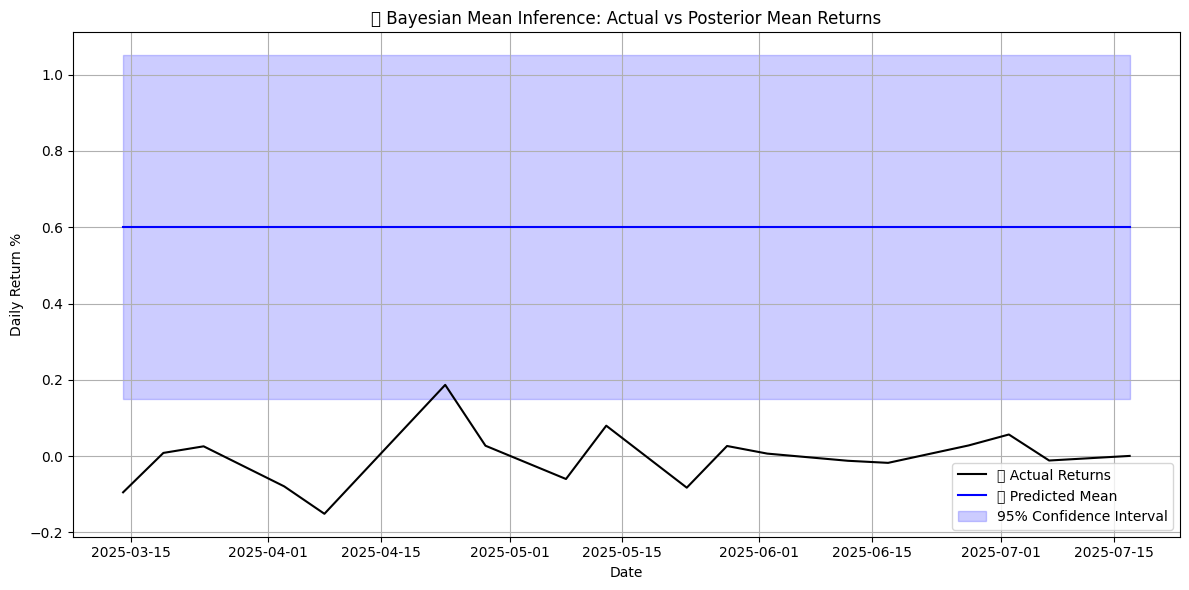

In [24]:
# 🧠 Use posterior mean as prediction for all samples (conjugate normal model)
predicted_returns = np.full_like(y_recent, posterior_mean)

# 🌀 Predictive uncertainty: sqrt(posterior variance)
predictive_std_dev = np.full_like(y_recent, np.sqrt(posterior_uncertainty[0, 0]))

# 📅 Align prediction window with actual date indices
prediction_dates = stock_data.index[-len(y_recent):]

# 📈 Plot actual vs predicted returns, with uncertainty bands
plt.figure(figsize=(12, 6))
plt.plot(prediction_dates, y_recent, label='📊 Actual Returns', color='black')
plt.plot(prediction_dates, predicted_returns, label='🔵 Predicted Mean', color='blue')

# 🩵 Shaded 95% confidence band (±2 std dev)
plt.fill_between(
    prediction_dates,
    predicted_returns - 2 * predictive_std_dev,
    predicted_returns + 2 * predictive_std_dev,
    color='blue',
    alpha=0.2,
    label='95% Confidence Interval'
)

plt.title('🔮 Bayesian Mean Inference: Actual vs Posterior Mean Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return %')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Exercise 3.2: Normal Conjugate Distributions

Suppose the **prior** over the parameter $\theta$ is normal:

$$
p(\theta) = \varphi(\theta; \mu_0, \sigma_0^2)
$$

and the **likelihood** of the data $x_1, \dots, x_n$ given $\theta$ is:

$$
p(x_{1:n} \mid \theta) = \prod_{i=1}^n \varphi(x_i; \theta, \sigma^2)
$$

where $\sigma^2$ is known.

---

Then, the **posterior distribution** is also normal:

$$
p(\theta \mid x_{1:n}) = \varphi(\theta; \mu_{\text{post}}, \sigma_{\text{post}}^2)
$$

with parameters:

$$
\mu_{\text{post}} = \frac{\sigma_0^2}{n \sigma_0^2 + \sigma^2} \, \bar{x} + \frac{\sigma^2}{n \sigma_0^2 + \sigma^2} \, \mu_0
$$

$$
\sigma_{\text{post}}^2 = \left( \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} \right)^{-1}
$$

where the sample mean is:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

---

### 🧠 Intuition

- We're doing **Bayesian inference on the mean** of a Gaussian.
- The **prior** and **likelihood** are both normal, so the **posterior is normal too** (this is the *conjugacy*).
- The posterior mean is a **weighted average** of the sample mean and prior mean.

---

### 💡 Bonus: Why This Matters for Trading

- This setup is ideal for modeling things like **expected return** or **mean volatility** over time.
- You can **sequentially update** beliefs as you receive new data — essential in fast-moving markets.
- The posterior variance gives you a **quantitative measure of uncertainty**, helping with **position sizing** or **confidence bands** in forecasts.


In [25]:
def compute_normal_conjugate_posterior(observations, prior_avg, prior_uncertainty, data_noise):
    """
    Updates a Normal prior with normally-distributed data (likelihood) using Bayes' Rule.
    
    Parameters:
        observations: list or array of observed values (e.g., stock returns, measurements)
        prior_avg: your initial guess for the mean (μ₀)
        prior_uncertainty: how uncertain you are about that guess (σ₀²)
        data_noise: assumed known variance in the data (σ²)

    Returns:
        updated_mean: float — the new best guess of the mean after seeing data
        updated_variance: float — the updated uncertainty
    """
    observations = np.array(observations)
    n_obs = len(observations)
    sample_mean = np.mean(observations)

    # Convert variances to precision (aka inverse variance)
    prior_precision = 1 / prior_uncertainty
    data_precision = n_obs / data_noise

    # Combine uncertainties to get the updated posterior variance
    updated_variance = 1 / (prior_precision + data_precision)

    # Weighted average of prior guess and sample data
    combined_info = (prior_precision * prior_avg) + (data_precision * sample_mean)
    updated_mean = updated_variance * combined_info

    return updated_mean, updated_variance



In [26]:
# Step 1: Grab the last 20 observed daily returns from your actual data
recent_returns = stock_data['DailyReturn'].dropna().values[-20:]

# Step 2: Set up your prior belief
prior_guess_mean = 0.0        # Prior belief: we expect the average return to be 0%
prior_guess_variance = 0.001  # Prior uncertainty: not super confident, but not clueless

# Step 3: Set the assumed noise level in the return data
assumed_data_variance = 0.01  # Belief about the natural volatility in daily returns

# Step 4: Use Bayesian update to refine your belief after seeing the data
updated_mean, updated_variance = compute_normal_conjugate_posterior(
    observations=recent_returns,
    prior_avg=prior_guess_mean,
    prior_uncertainty=prior_guess_variance,
    data_noise=assumed_data_variance
)

# Step 5: Display the updated belief about the true mean return
print(f"Updated (Posterior) Mean Return:     {updated_mean:.6f}")
print(f"Updated (Posterior) Return Variance: {updated_variance:.6f}")


Updated (Posterior) Mean Return:     -0.002500
Updated (Posterior) Return Variance: 0.000345


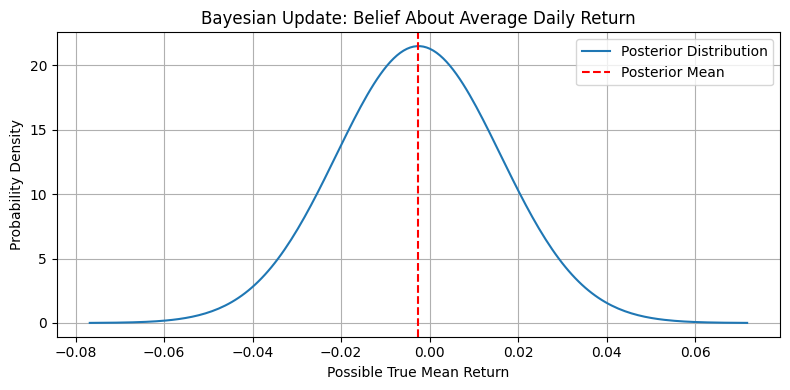

In [27]:
# Visualize updated belief about the true average return

# 1. Create a range centered around the updated mean (±4 standard deviations)
x_vals = np.linspace(
    updated_mean - 4 * np.sqrt(updated_variance),
    updated_mean + 4 * np.sqrt(updated_variance),
    200
)

# 2. Compute the probability density of each x value under the posterior normal distribution
posterior_density = norm.pdf(x_vals, loc=updated_mean, scale=np.sqrt(updated_variance))

# 3. Plot the posterior distribution
plt.figure(figsize=(8, 4))
plt.plot(x_vals, posterior_density, label='Posterior Distribution')
plt.axvline(updated_mean, color='red', linestyle='--', label='Posterior Mean')

# 4. Customize and show the plot
plt.title('Bayesian Update: Belief About Average Daily Return')
plt.xlabel('Possible True Mean Return')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔮 Exercise 3.3: Prediction with Gaussian Processes (GPs)

Show that the **predictive distribution** for a Gaussian Process, given training data \(D = \{X, Y\}\), and a test input \(x^*\), with Gaussian noise variance \(\sigma_n^2\), is:

$$
f^* \mid D, x^* \sim \mathcal{N}\big(\mathbb{E}[f^* \mid D, x^*], \operatorname{Var}[f^* \mid D, x^*]\big)
$$

where the **posterior moments** over \(X^*\) are:

$$
\mathbb{E}[f^* \mid D, X^*] = \mu_{X^*} + K_{X^*, X} \left(K_{X, X} + \sigma_n^2 I\right)^{-1} Y
$$

$$
\operatorname{Var}[f^* \mid D, X^*] = K_{X^*, X^*} - K_{X^*, X} \left(K_{X, X} + \sigma_n^2 I\right)^{-1} K_{X, X^*}
$$

---

### 🧠 Intuition

- The **mean prediction** combines the prior mean 
$$
\mu_{X^*}
$$
and a correction term based on the similarity (kernel) between the test points and training points.
- The **variance** shrinks where training data is dense and grows where data is sparse — reflecting uncertainty.
- This framework naturally gives **uncertainty estimates** along with predictions, useful for risk-aware trading decisions.

---

### 💡 Bonus: Why This Matters for Trading

- GPs allow you to **predict complex, nonlinear market behaviors** with uncertainty.
- The predictive variance helps in **assessing confidence** before entering trades.
- Can be used for **Bayesian optimization** in portfolio allocation or option pricing.


In [28]:
def rbf_kernel(X1, X2, length_scale=1.0, variance=1.0):
    """
    Radial Basis Function (RBF) kernel — measures similarity between points.
    
    Args:
        X1, X2: Input arrays of shape (n_samples, n_features)
        length_scale: Controls how far the influence of a point extends
        variance: Controls the height (vertical stretch) of the kernel

    Returns:
        Kernel matrix of shape (n_samples_X1, n_samples_X2)
    """
    # Compute pairwise squared Euclidean distances
    sqdist = (
        np.sum(X1**2, axis=1).reshape(-1, 1) +  # (n, 1)
        np.sum(X2**2, axis=1) -                # (m,)
        2 * X1 @ X2.T                          # (n, m)
    )
    
    # Apply the RBF formula
    return variance * np.exp(-0.5 * sqdist / length_scale**2)

def gp_predict(X_train, y_train, X_test, noise_var=1e-4, kernel_func=rbf_kernel, **kernel_params):
    """
    Predict the output at new inputs using a Gaussian Process model.
    
    Args:
        X_train: Known input features (n_train, d)
        y_train: Observed outputs (n_train,)
        X_test: New input points to predict at (n_test, d)
        noise_var: Observation noise variance σ²_n
        kernel_func: Function to compute similarity (defaults to RBF)
        kernel_params: Extra hyperparameters like length_scale, variance
    
    Returns:
        pred_mean: Predicted mean at test points (n_test,)
        pred_var: Predictive variance (uncertainty) at test points (n_test,)
    """
    # 1. Compute the covariance (similarity) between training points
    K_train = kernel_func(X_train, X_train, **kernel_params)
    K_train += noise_var * np.eye(len(X_train))  # Add noise to diagonal for numerical stability

    # 2. Compute the covariance between test and training points
    K_cross = kernel_func(X_test, X_train, **kernel_params)

    # 3. Compute the covariance among test points
    K_test = kernel_func(X_test, X_test, **kernel_params)

    # 4. Invert the training covariance matrix
    K_train_inv = np.linalg.inv(K_train)

    # 5. Compute the predicted mean: how much each train point pulls on the test point
    pred_mean = K_cross @ K_train_inv @ y_train

    # 6. Compute uncertainty in prediction (posterior covariance)
    pred_cov = K_test - K_cross @ K_train_inv @ K_cross.T
    pred_var = np.diag(pred_cov)  # Only care about variance along the diagonal

    return pred_mean, pred_var


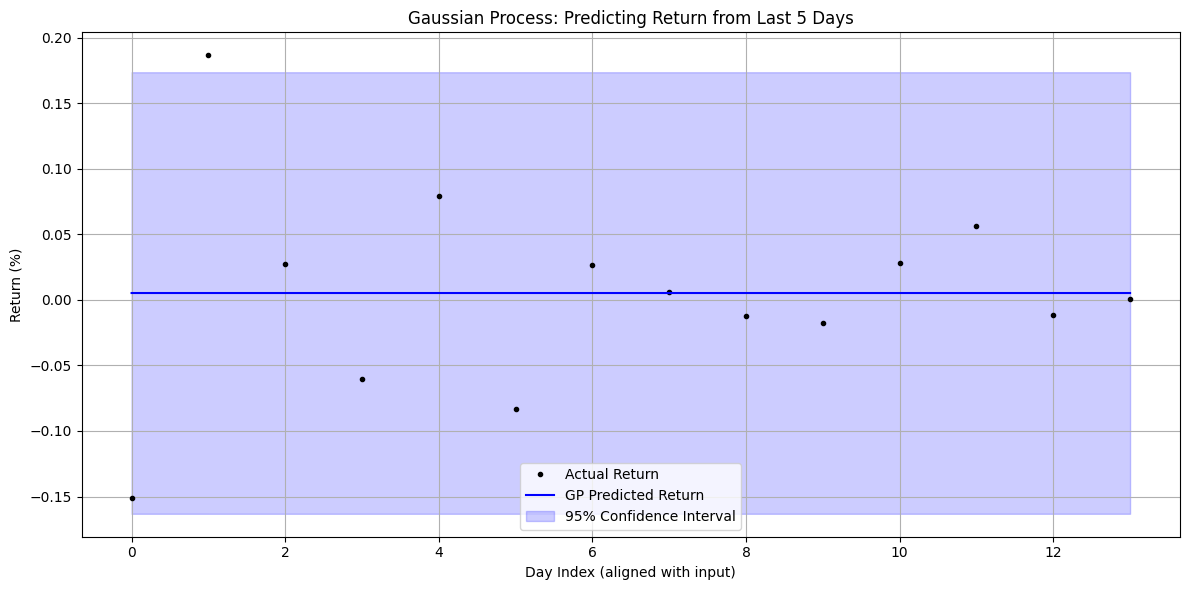

In [29]:
# Extract return data (drop missing values)
daily_returns = stock_data[('DailyReturn', )].dropna().values

# Define how many past days to use for each prediction
lookback_days = 5

# Build feature matrix X and target vector y
X = []  # Each row = returns from previous `lookback_days`
y = []  # Each value = return today

for t in range(lookback_days, len(daily_returns)):
    past_returns = daily_returns[t - lookback_days : t]
    today_return = daily_returns[t]
    X.append(past_returns)
    y.append(today_return)

X = np.array(X)
y = np.array(y)


# Set up a simple RBF kernel — we can optimize this later
kernel = RBF(length_scale=1.0)

# Fit GP with small noise variance to prevent overfitting
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
gp.fit(X, y)

# Predict returns (in-sample)
y_pred, y_std = gp.predict(X, return_std=True)

# Time axis for plotting
t_idx = np.arange(len(y))  # index aligned with y

# Plot actual vs predicted returns
plt.figure(figsize=(12, 6))
plt.plot(t_idx, y, 'k.', label='Actual Return')
plt.plot(t_idx, y_pred, 'b-', label='GP Predicted Return')
plt.fill_between(
    t_idx,
    y_pred - 2 * y_std,
    y_pred + 2 * y_std,
    color='blue',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.title(f'Gaussian Process: Predicting Return from Last {lookback_days} Days')
plt.xlabel('Day Index (aligned with input)')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Real-World Applications of Bayesian Regression & Gaussian Processes (Chapter 3)

Using real stock market data, Chapter 3 techniques can be directly applied to real-world forecasting and trading strategies:

#### 🔁 Example Workflow
1. Collect recent price & volatility data  
2. Fit Bayesian or GP model  
3. Predict next-day return + uncertainty  
4. Adjust position sizing based on confidence  
5. Update model as new data arrives

---

#### 🧠 Summary
These models allow you to:
- Make **probabilistic forecasts** for stock returns or volatility  
- **Continuously adapt** to new market data  
- **Manage risk more intelligently** using your model’s uncertainty  
All using **real, live market data**.


|

**Example**:  
Predict portfolio's/tickers next-day return using features like:
- Last 5 days’ returns
- Rolling volatility  
- Technical indicators (e.g., RSI, MACD)

In [30]:
from trading_functions import rsi_calculator, bayesian_rsi_signal


🚀 ANALYZING CZOOF


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for CZOOF...
🟠 Running Gaussian Process for CZOOF...


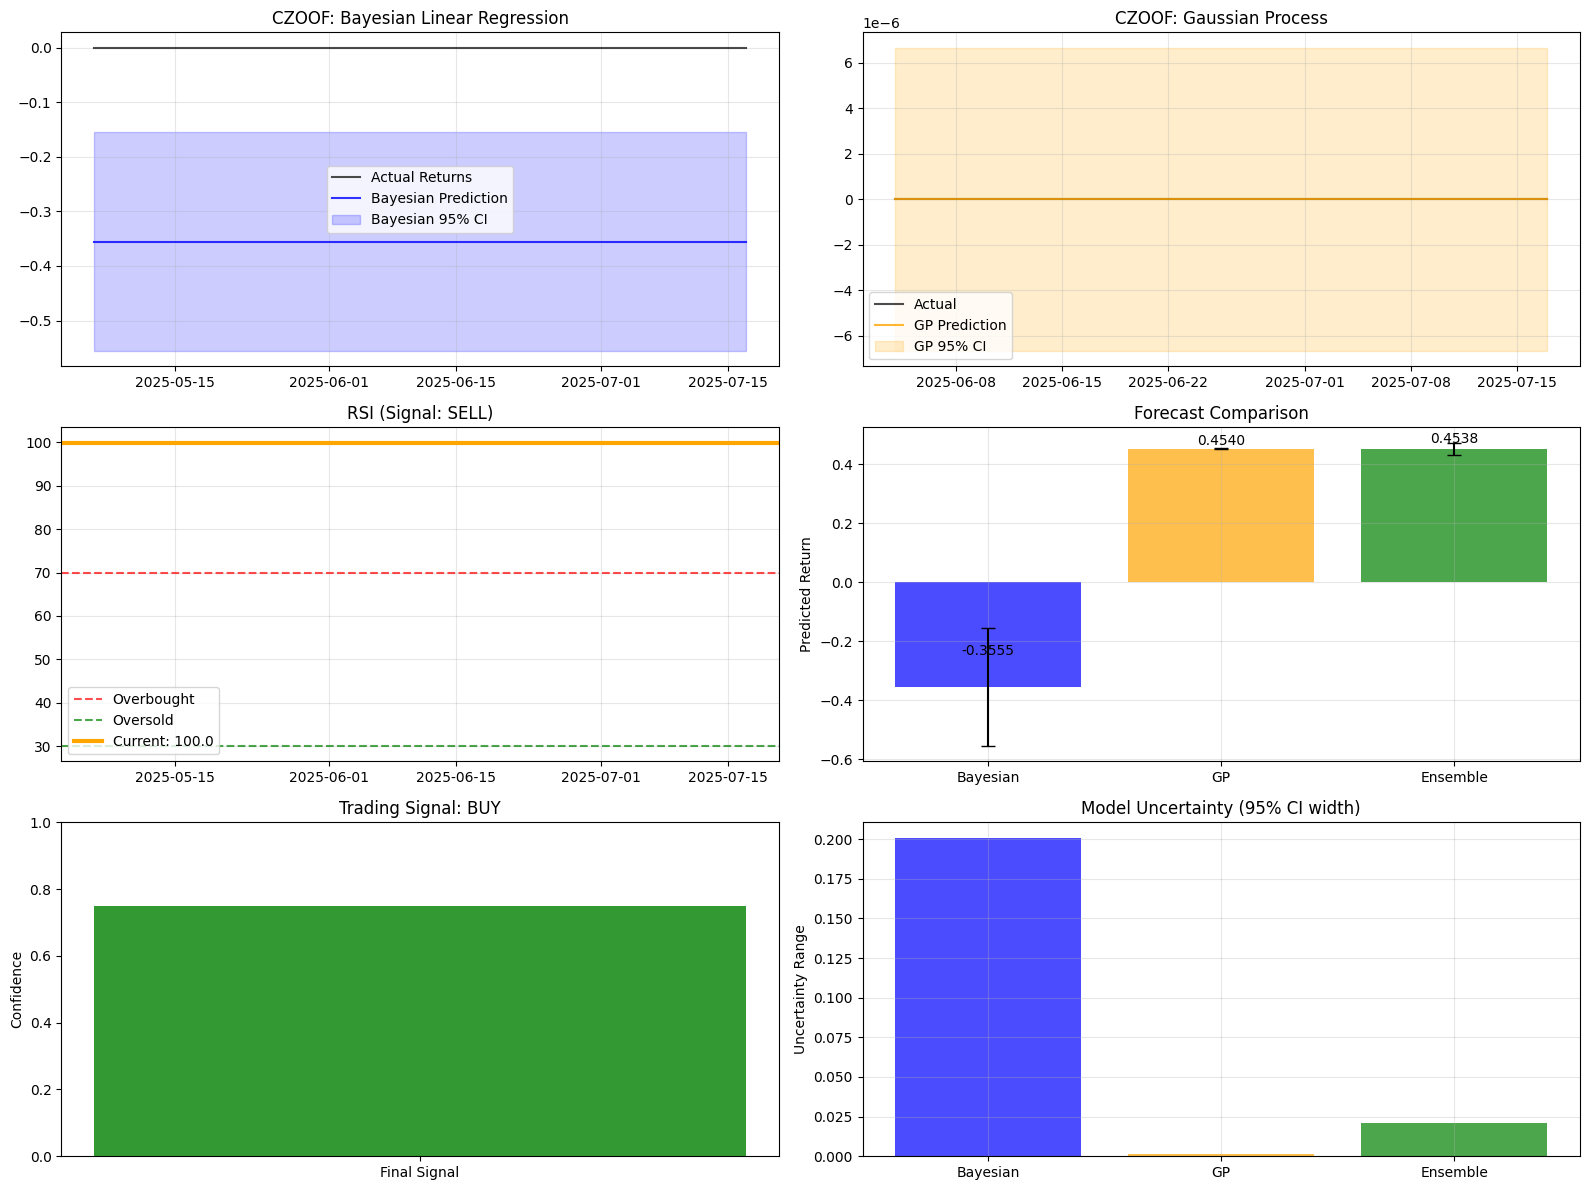


📊 CZOOF - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: -0.3555 ± 0.2005
🟠 GP Forecast:       0.4540 ± 0.0016
🟢 Ensemble Forecast: 0.4538 ± 0.0208
📈 RSI Signal:        SELL (RSI: 100.0)
🎯 Final Signal:      BUY (Confidence: 75.0%)
💰 Recommendation:    BUY

✅ Analysis completed for czoof

🚀 ANALYZING FCNVX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FCNVX

🚀 ANALYZING FDIG


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for FDIG...
🟠 Running Gaussian Process for FDIG...


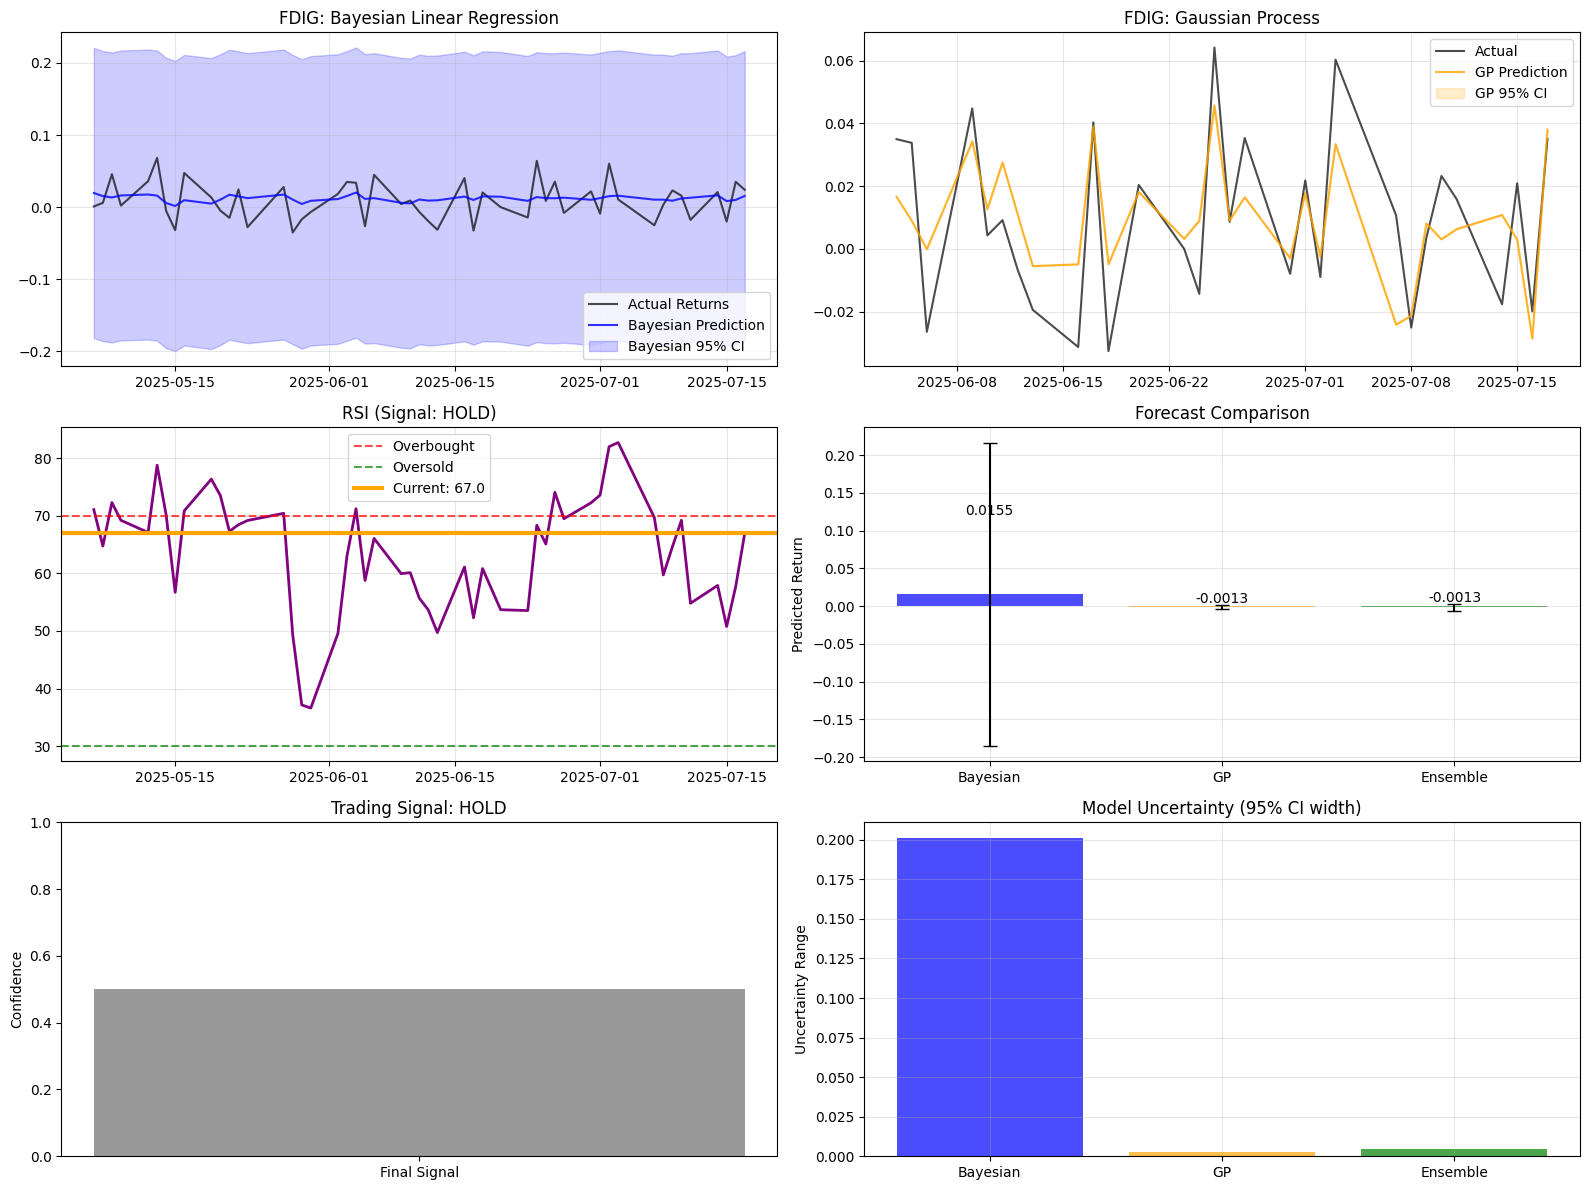


📊 FDIG - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: 0.0155 ± 0.2010
🟠 GP Forecast:       -0.0013 ± 0.0029
🟢 Ensemble Forecast: -0.0013 ± 0.0046
📈 RSI Signal:        HOLD (RSI: 67.0)
🎯 Final Signal:      HOLD (Confidence: 50.0%)
💰 Recommendation:    HOLD

✅ Analysis completed for fdig

🚀 ANALYZING FDKVX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FDKVX

🚀 ANALYZING FEDDX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FEDDX

🚀 ANALYZING FFRHX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FFRHX

🚀 ANALYZING FIFNX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FIFNX

🚀 ANALYZING FITLX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FITLX

🚀 ANALYZING FLOWX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FLOWX

🚀 ANALYZING FSENX


[*********************100%***********************]  1 of 1 completed


⚠️ Not enough usable data after cleaning for FSENX

🚀 ANALYZING LION


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for LION...
🟠 Running Gaussian Process for LION...


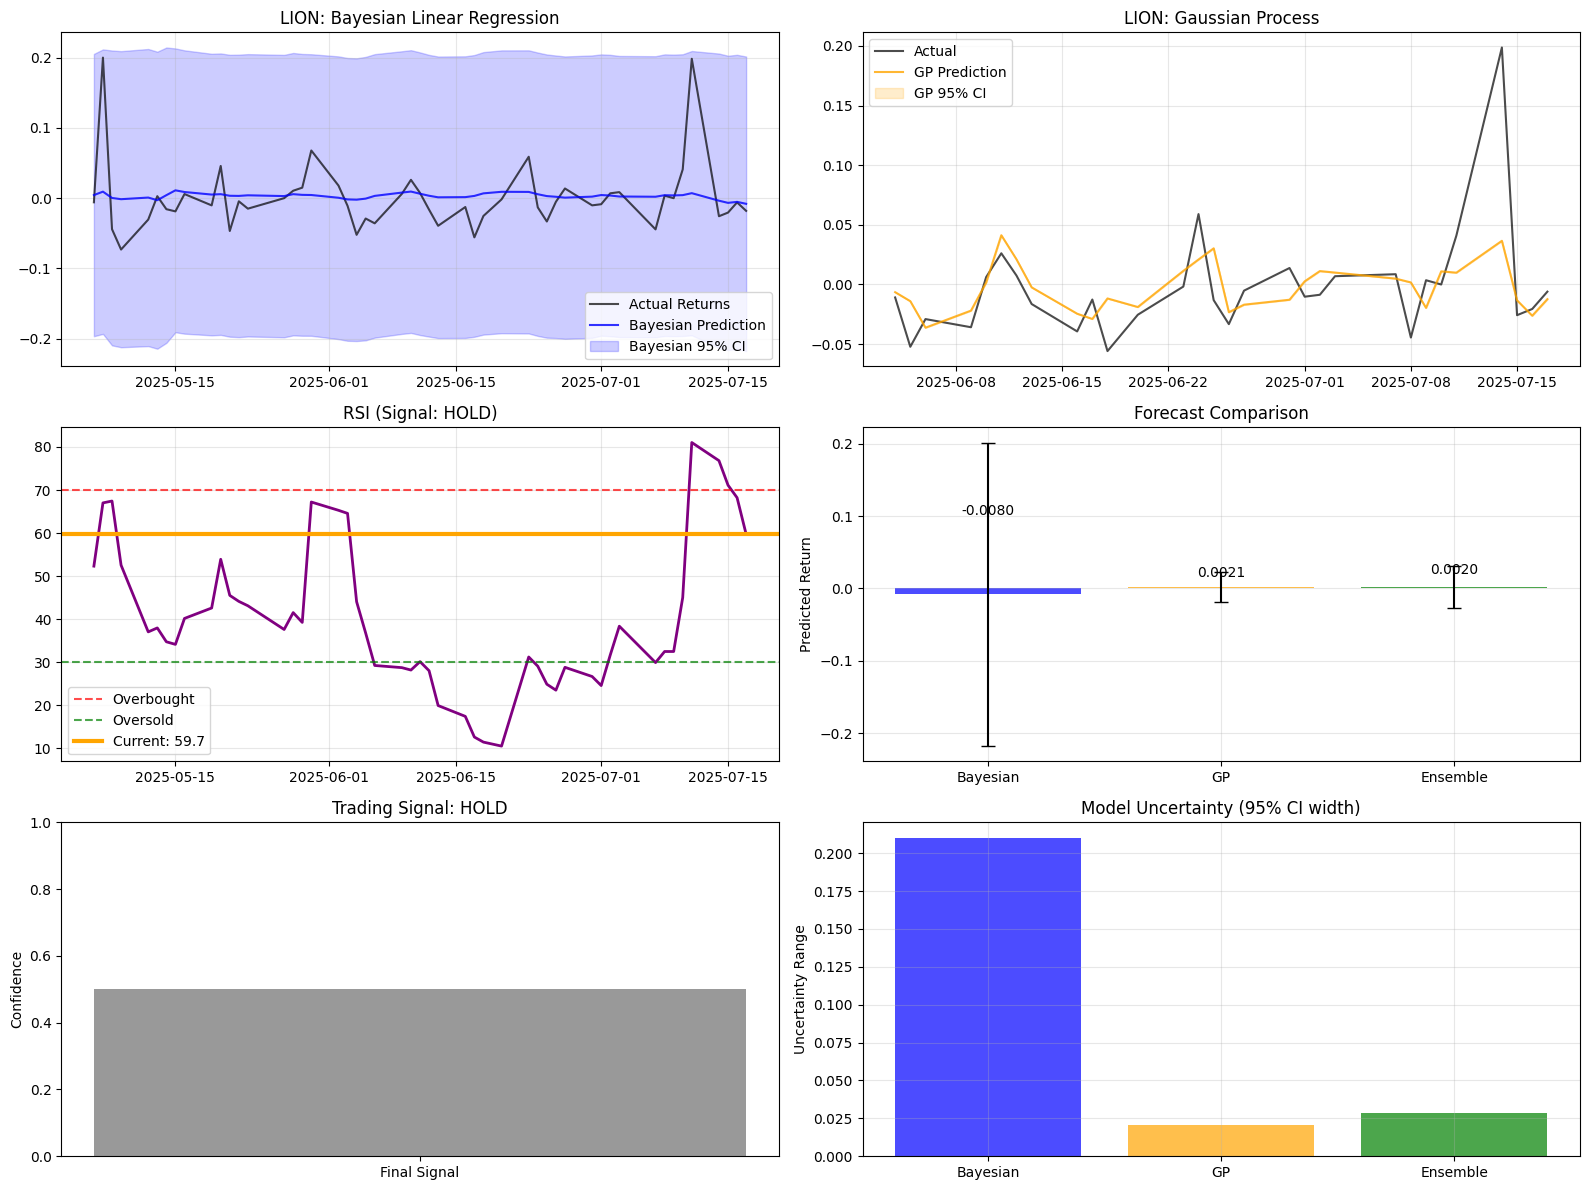


📊 LION - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: -0.0080 ± 0.2098
🟠 GP Forecast:       0.0021 ± 0.0204
🟢 Ensemble Forecast: 0.0020 ± 0.0289
📈 RSI Signal:        HOLD (RSI: 59.7)
🎯 Final Signal:      HOLD (Confidence: 50.0%)
💰 Recommendation:    HOLD

✅ Analysis completed for LION

🚀 ANALYZING OLLI


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for OLLI...
🟠 Running Gaussian Process for OLLI...


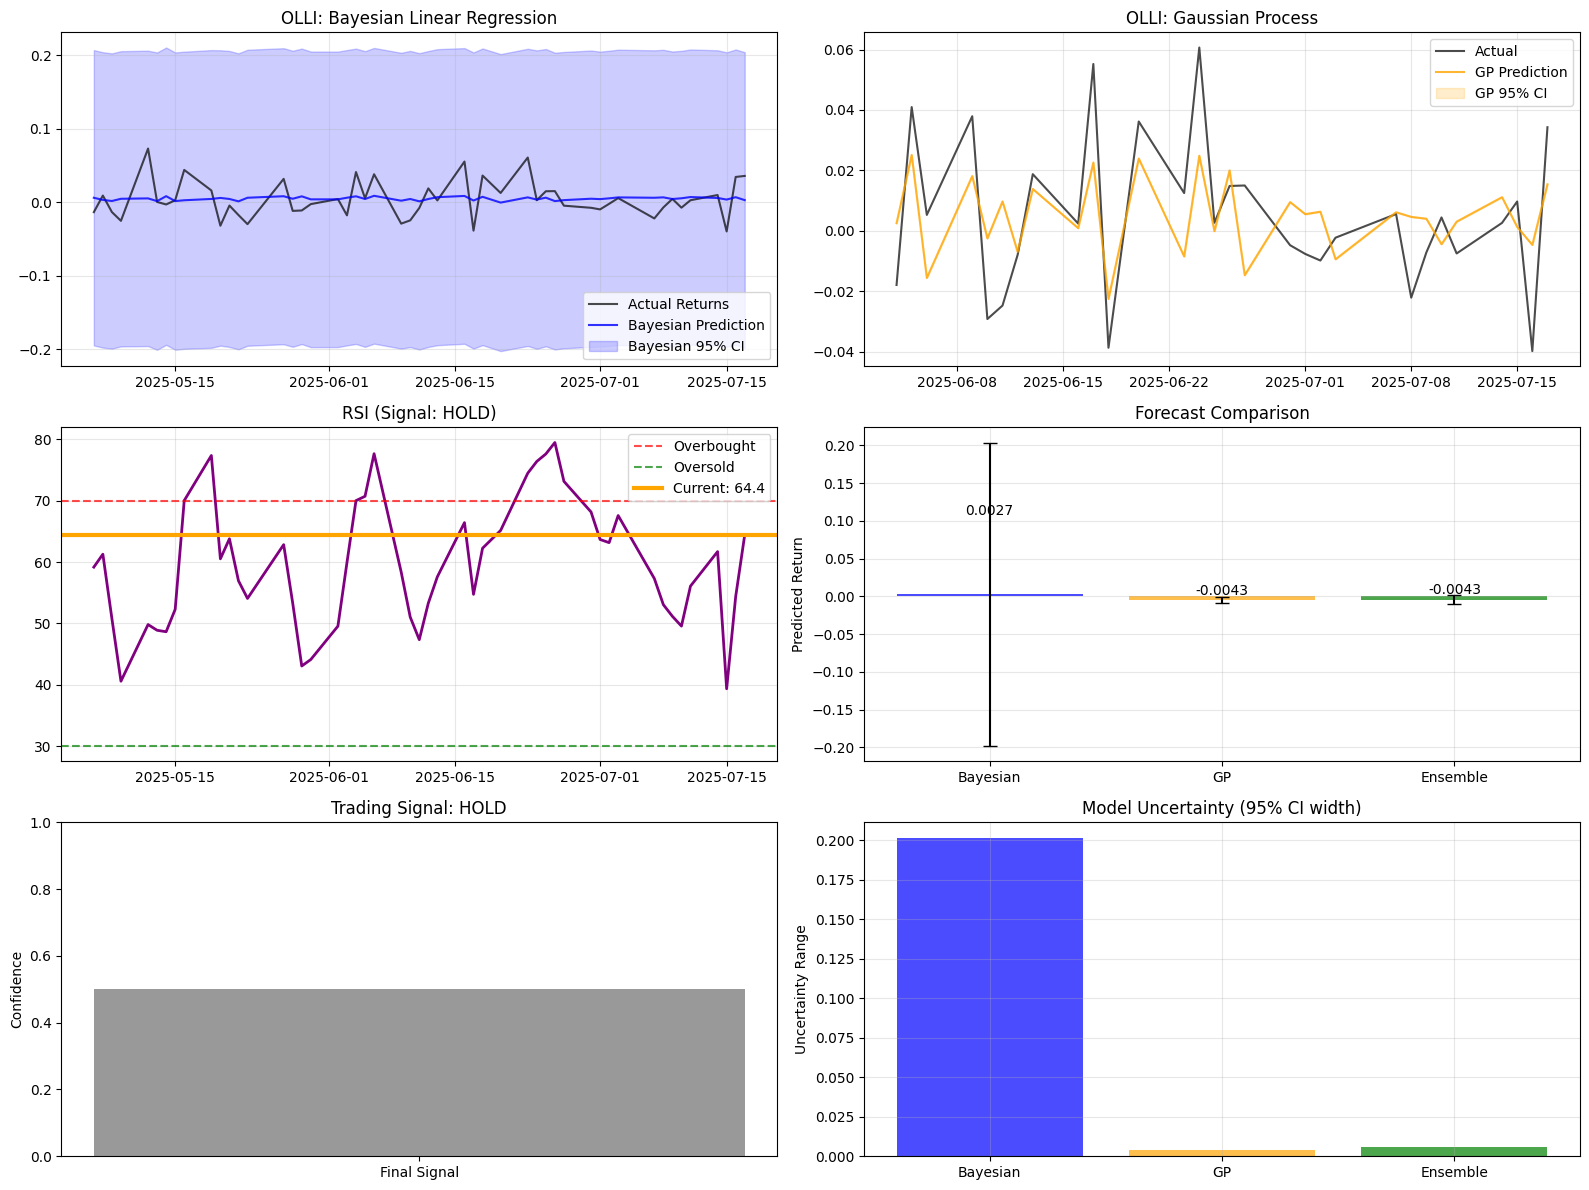


📊 OLLI - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: 0.0027 ± 0.2012
🟠 GP Forecast:       -0.0043 ± 0.0040
🟢 Ensemble Forecast: -0.0043 ± 0.0060
📈 RSI Signal:        HOLD (RSI: 64.4)
🎯 Final Signal:      HOLD (Confidence: 50.0%)
💰 Recommendation:    HOLD

✅ Analysis completed for OLLI

🚀 ANALYZING UNP


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for UNP...
🟠 Running Gaussian Process for UNP...


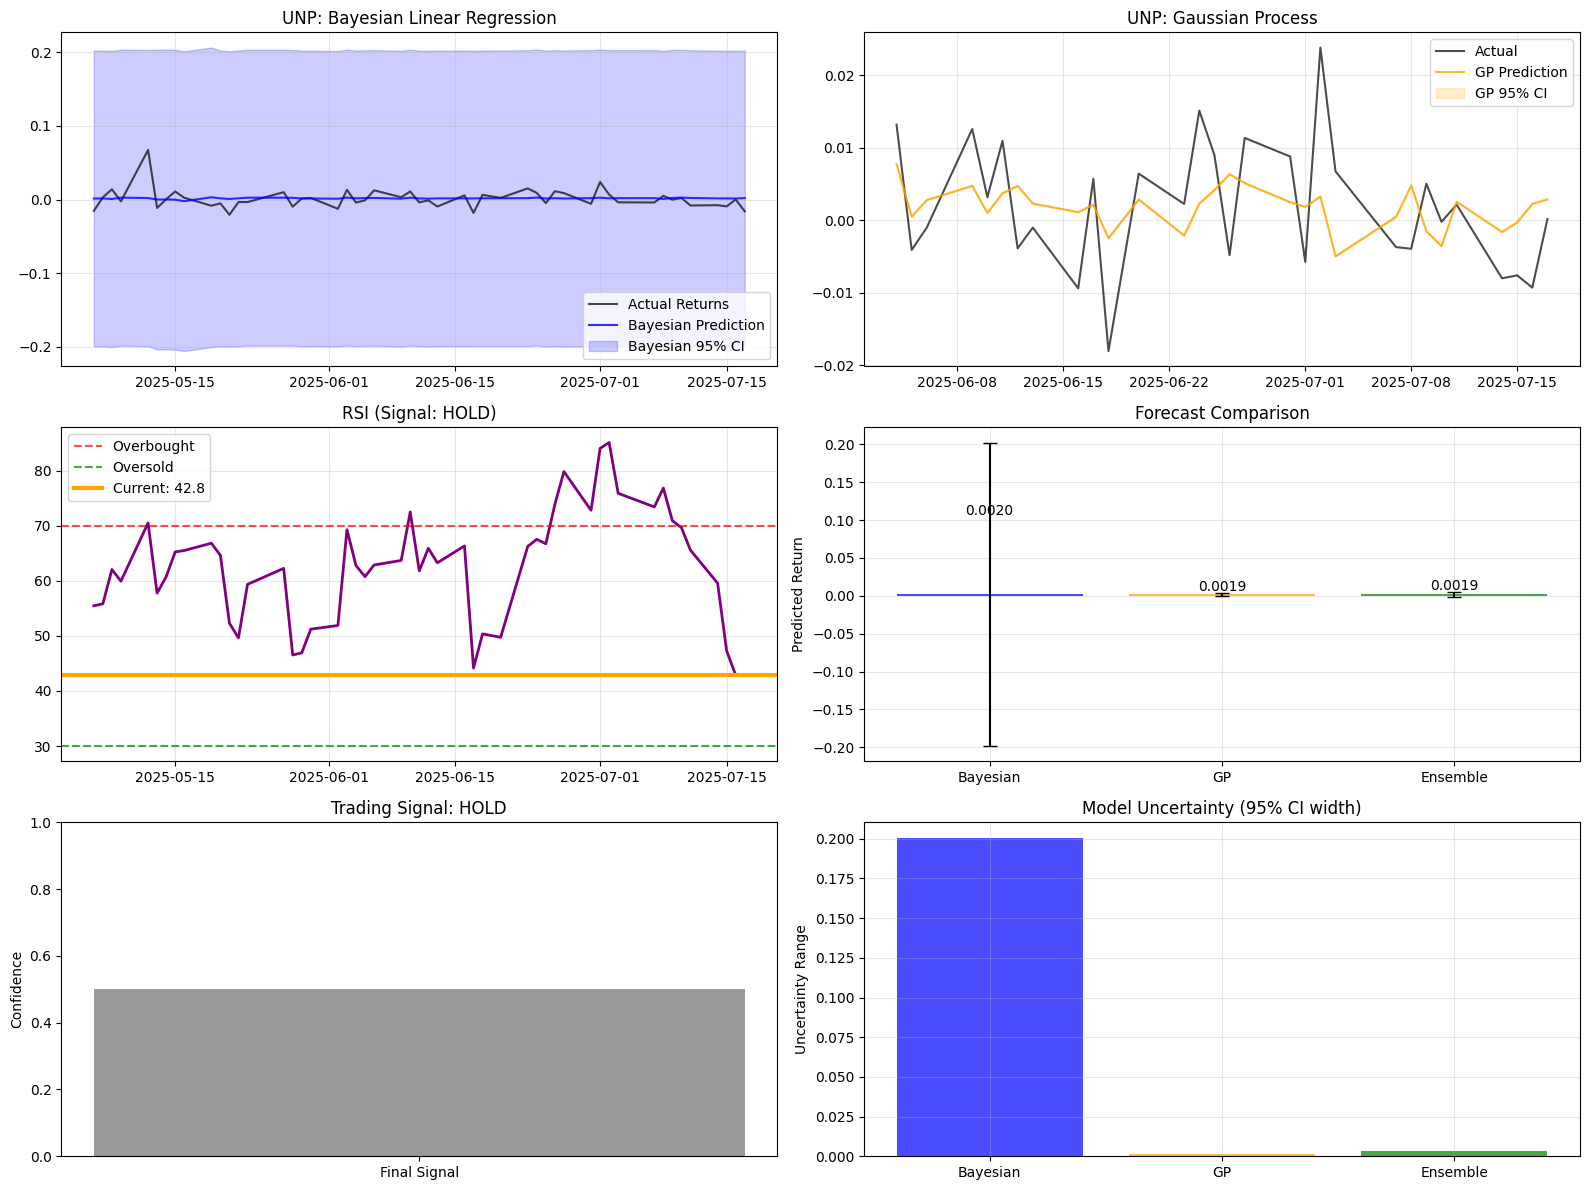


📊 UNP - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: 0.0020 ± 0.2003
🟠 GP Forecast:       0.0019 ± 0.0017
🟢 Ensemble Forecast: 0.0019 ± 0.0031
📈 RSI Signal:        HOLD (RSI: 42.8)
🎯 Final Signal:      HOLD (Confidence: 50.0%)
💰 Recommendation:    HOLD

✅ Analysis completed for UNP

🚀 ANALYZING VZ


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for VZ...
🟠 Running Gaussian Process for VZ...


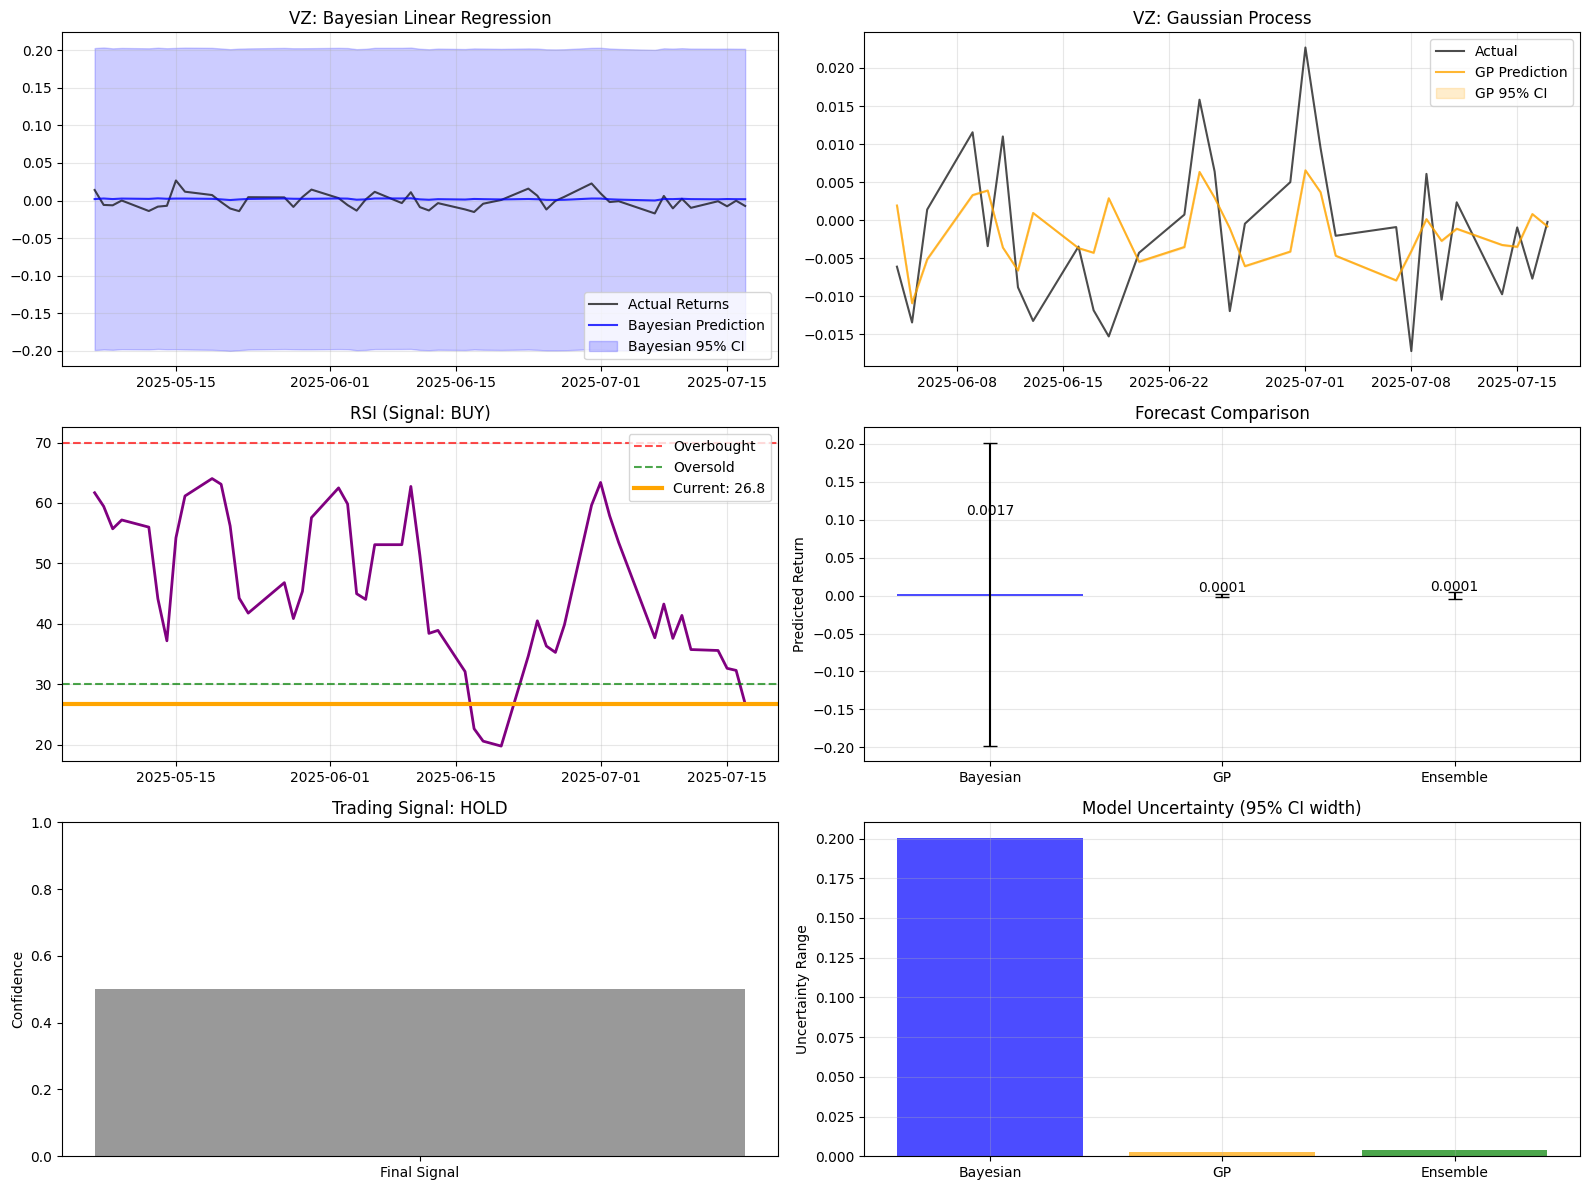


📊 VZ - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: 0.0017 ± 0.2002
🟠 GP Forecast:       0.0001 ± 0.0025
🟢 Ensemble Forecast: 0.0001 ± 0.0040
📈 RSI Signal:        BUY (RSI: 26.8)
🎯 Final Signal:      HOLD (Confidence: 50.0%)
💰 Recommendation:    HOLD

✅ Analysis completed for VZ

🚀 ANALYZING WPP


[*********************100%***********************]  1 of 1 completed



🔵 Running Bayesian Linear Regression for WPP...
🟠 Running Gaussian Process for WPP...


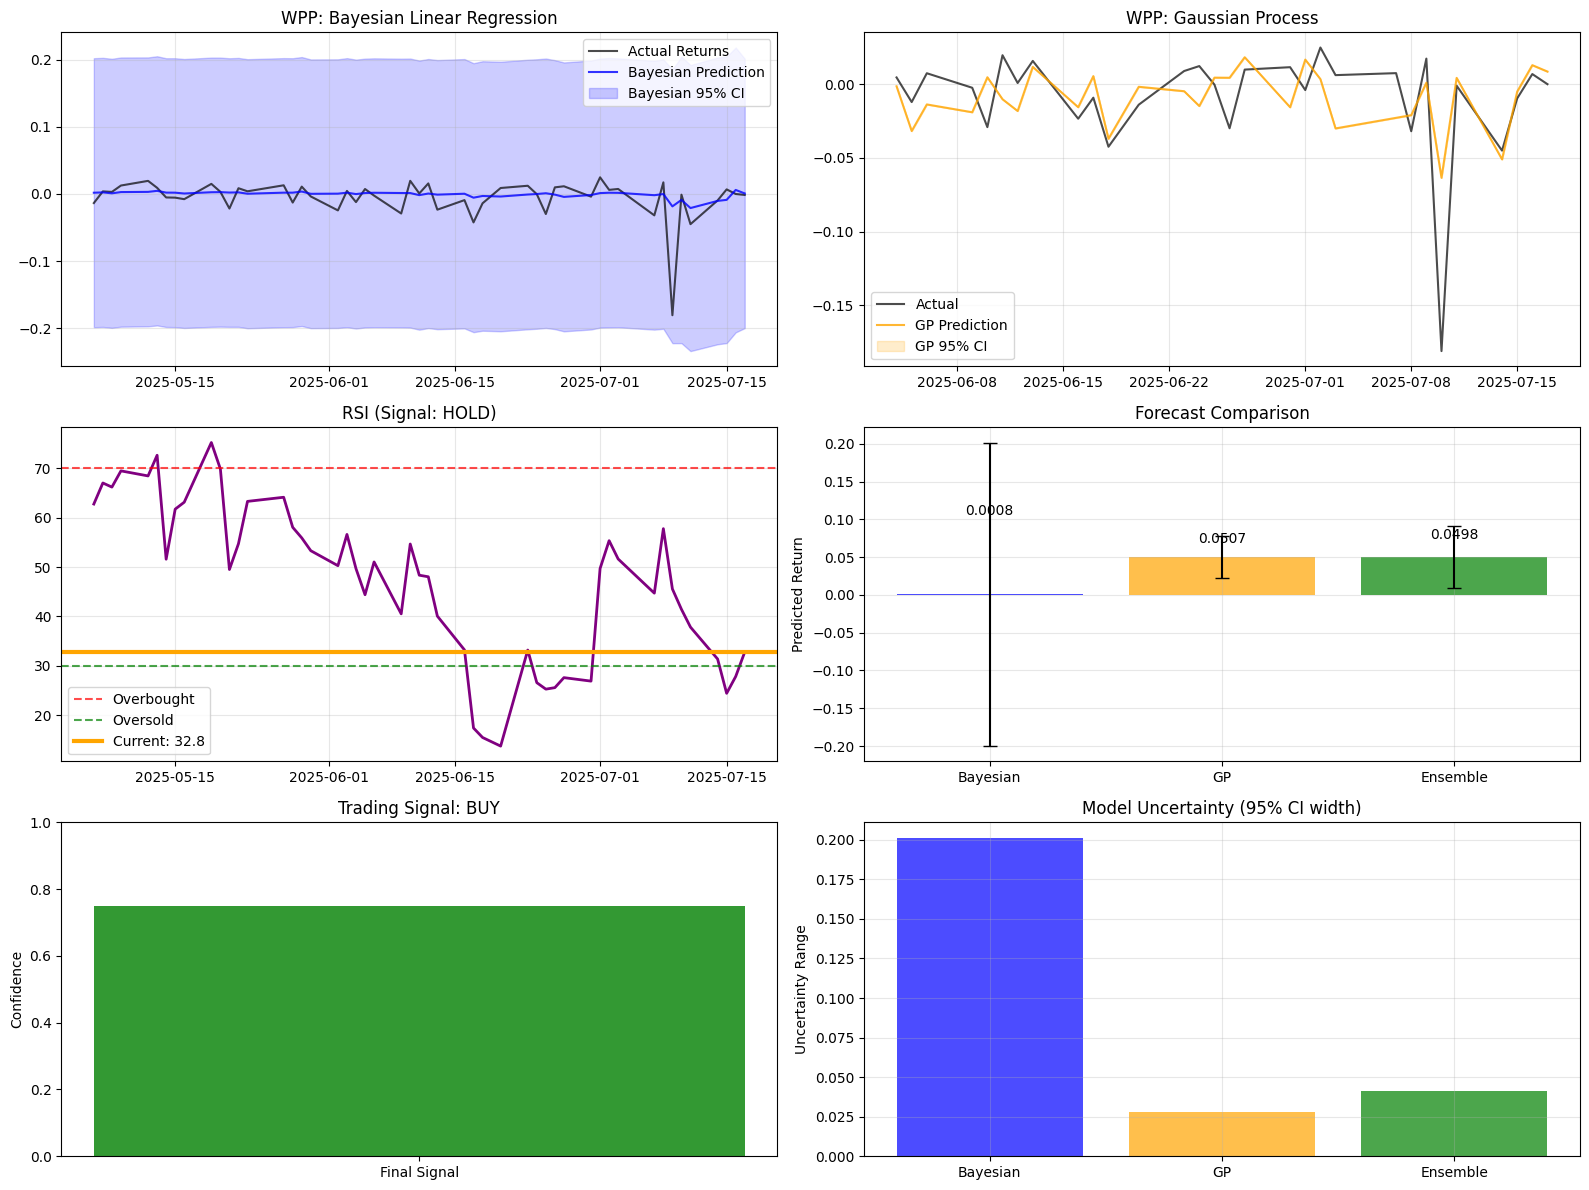


📊 WPP - Unified Forecast Summary (2025-07-17)
🔵 Bayesian Forecast: 0.0008 ± 0.2010
🟠 GP Forecast:       0.0507 ± 0.0278
🟢 Ensemble Forecast: 0.0498 ± 0.0412
📈 RSI Signal:        HOLD (RSI: 32.8)
🎯 Final Signal:      BUY (Confidence: 75.0%)
💰 Recommendation:    BUY

✅ Analysis completed for WPP

🎯 PORTFOLIO ANALYSIS SUMMARY
Ticker   | Holdings | Signal       | Confidence | Forecast  
----------------------------------------------------------------------
czoof    | 0.200    | BUY          | 75.0%      | 0.4538++++
fdig     | 0.925    | HOLD         | 50.0%      | -0.0013+++
LION     | 2.000    | HOLD         | 50.0%      | 0.0020++++
OLLI     | 0.175    | HOLD         | 50.0%      | -0.0043+++
UNP      | 0.100    | HOLD         | 50.0%      | 0.0019++++
VZ       | 0.500    | HOLD         | 50.0%      | 0.0001++++
WPP      | 0.300    | BUY          | 75.0%      | 0.0498++++


In [31]:
def unified_bayesian_gp_forecast(ticker, period="200d", interval="1d", num_lags=10):
    """
    Combined Bayesian Linear Regression + Gaussian Process forecasting system.
    Uses both approaches and creates an ensemble prediction with uncertainty quantification.
    """
    # Download and prepare data
    df = yf.download(ticker, period=period, interval=interval)
    if df.empty or len(df) < max(20, num_lags + 1):
        print(f"❌ Not enough data for {ticker}")
        return None
    
    # Feature engineering
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df = rsi_calculator(df)
    df['RSI'] = df['rsi_14']
    
    # Create lagged features for both models
    for lag in range(1, max(6, num_lags + 1)):
        df[f'Return_lag{lag}'] = df['Return'].shift(lag)
    
    df = df.dropna()
    
    if df.empty or len(df) < 10:
        print(f"⚠️ Not enough usable data after cleaning for {ticker}")
        return None
    
    # ==============================
    # 🧠 METHOD 1: BAYESIAN LINEAR REGRESSION
    # ==============================
    print(f"\n🔵 Running Bayesian Linear Regression for {ticker}...")
    
    # Bayesian features: lagged returns + volatility + RSI
    bayesian_features = [f'Return_lag{lag}' for lag in range(1, 6)] + ['Volatility', 'RSI']
    X_bayesian = df[bayesian_features].values
    y_bayesian = df['Return'].values
    
    # Bayesian inference
    prior_beliefs = np.zeros(X_bayesian.shape[1])
    prior_uncertainty = np.eye(X_bayesian.shape[1]) * 0.1
    data_noise_level = 0.01
    
    posterior_mean, posterior_cov = update_beliefs_with_data(
        X_bayesian, y_bayesian, prior_beliefs, prior_uncertainty, data_noise_level
    )
    
    # Bayesian predictions
    y_pred_bayesian = X_bayesian @ posterior_mean
    y_std_bayesian = np.sqrt(np.sum(X_bayesian @ posterior_cov * X_bayesian, axis=1) + data_noise_level)
    
    # Latest Bayesian prediction
    bayesian_forecast = y_pred_bayesian[-1]
    bayesian_std = y_std_bayesian[-1]
    bayesian_ci_lower = bayesian_forecast - 2 * bayesian_std
    bayesian_ci_upper = bayesian_forecast + 2 * bayesian_std
    
    # ==============================
    # 🟠 METHOD 2: GAUSSIAN PROCESS
    # ==============================
    print(f"🟠 Running Gaussian Process for {ticker}...")
    
    # GP features: just lagged returns (pure time series)
    gp_features = [f'Return_lag{i}' for i in range(1, num_lags + 1)]
    X_gp = df[gp_features].values
    y_gp = df['Return'].values
    
    # GP training/testing split
    X_gp_train, y_gp_train = X_gp[:-1], y_gp[:-1]
    X_gp_test = X_gp[-1:].reshape(1, -1)
    
    # GP prediction using custom function
    gp_pred_mean, gp_pred_var = gp_predict(
        X_gp_train, y_gp_train, X_gp_test,
        noise_var=1e-4,
        kernel_func=rbf_kernel,
        length_scale=1.0,
        variance=1.0
    )
    
    # GP results
    gp_forecast = gp_pred_mean[0]
    gp_std = np.sqrt(gp_pred_var[0])
    gp_ci_lower = gp_forecast - 2 * gp_std
    gp_ci_upper = gp_forecast + 2 * gp_std
    
    # ==============================
    # 📈 RSI TECHNICAL SIGNAL
    # ==============================
    current_rsi = df['RSI'].iloc[-1]
    rsi_signal, rsi_probs = bayesian_rsi_signal(current_rsi)
    
    # ==============================
    # 🎯 ENSEMBLE COMBINATION
    # ==============================
    
    # Weight models by their uncertainty (inverse variance weighting)
    bayesian_weight = 1 / (bayesian_std**2 + 1e-6)
    gp_weight = 1 / (gp_std**2 + 1e-6)
    total_weight = bayesian_weight + gp_weight
    
    # Ensemble prediction
    ensemble_forecast = (
        (bayesian_weight * bayesian_forecast + gp_weight * gp_forecast) / total_weight
    )
    
    # Combined uncertainty (conservative approach)
    ensemble_std = np.sqrt(
        (bayesian_weight * (bayesian_std**2 + bayesian_forecast**2) + 
         gp_weight * (gp_std**2 + gp_forecast**2)) / total_weight - ensemble_forecast**2
    )
    
    ensemble_ci_lower = ensemble_forecast - 2 * ensemble_std
    ensemble_ci_upper = ensemble_forecast + 2 * ensemble_std
    
    # ==============================
    # 🎪 TRADING SIGNAL GENERATION
    # ==============================
    
    def generate_ensemble_signal(bayesian_pred, gp_pred, ensemble_pred, rsi_signal):
        """Generate trading signal from ensemble of models"""
        
        # Count bullish signals
        signals = []
        if bayesian_ci_lower > 0: signals.append("bayesian_bull")
        elif bayesian_ci_upper < 0: signals.append("bayesian_bear")
        
        if gp_ci_lower > 0: signals.append("gp_bull")
        elif gp_ci_upper < 0: signals.append("gp_bear")
        
        if ensemble_ci_lower > 0: signals.append("ensemble_bull")
        elif ensemble_ci_upper < 0: signals.append("ensemble_bear")
        
        # RSI signal
        if rsi_signal == "buy": signals.append("rsi_bull")
        elif rsi_signal == "sell": signals.append("rsi_bear")
        
        # Count bullish vs bearish
        bull_count = len([s for s in signals if "bull" in s])
        bear_count = len([s for s in signals if "bear" in s])
        
        if bull_count >= 3:
            return "STRONG BUY", 0.9
        elif bull_count >= 2:
            return "BUY", 0.75
        elif bear_count >= 3:
            return "STRONG SELL", 0.9
        elif bear_count >= 2:
            return "SELL", 0.75
        else:
            return "HOLD", 0.5
    
    final_signal, confidence = generate_ensemble_signal(
        bayesian_forecast, gp_forecast, ensemble_forecast, rsi_signal
    )
    
    # ==============================
    # 📊 VISUALIZATION
    # ==============================
    
    plt.figure(figsize=(16, 12))
    
    # Plot 1: Model Predictions Comparison
    plt.subplot(3, 2, 1)
    recent_dates = df.index[-50:]  # Last 50 days
    recent_returns = df['Return'].iloc[-50:].values
    recent_bayesian = y_pred_bayesian[-50:]
    
    plt.plot(recent_dates, recent_returns, 'k-', label='Actual Returns', alpha=0.7)
    plt.plot(recent_dates, recent_bayesian, 'b-', label='Bayesian Prediction', alpha=0.8)
    plt.fill_between(recent_dates, 
                     recent_bayesian - 2*y_std_bayesian[-50:],
                     recent_bayesian + 2*y_std_bayesian[-50:],
                     color='blue', alpha=0.2, label='Bayesian 95% CI')
    plt.title(f'{ticker}: Bayesian Linear Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: GP Performance on recent data
    plt.subplot(3, 2, 2)
    gp_pred_recent, gp_std_recent = gp_predict(
        X_gp_train[-30:], y_gp_train[-30:], X_gp_train[-30:],
        noise_var=1e-4, kernel_func=rbf_kernel, length_scale=1.0, variance=1.0
    )
    
    plt.plot(recent_dates[-30:], y_gp_train[-30:], 'k-', label='Actual', alpha=0.7)
    plt.plot(recent_dates[-30:], gp_pred_recent, 'orange', label='GP Prediction', alpha=0.8)
    plt.fill_between(recent_dates[-30:], 
                     gp_pred_recent - 2*gp_std_recent,
                     gp_pred_recent + 2*gp_std_recent,
                     color='orange', alpha=0.2, label='GP 95% CI')
    plt.title(f'{ticker}: Gaussian Process')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 3: RSI
    plt.subplot(3, 2, 3)
    plt.plot(recent_dates, df['RSI'].iloc[-50:], 'purple', linewidth=2)
    plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought')
    plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold')
    plt.axhline(current_rsi, color='orange', linewidth=3, label=f'Current: {current_rsi:.1f}')
    plt.title(f'RSI (Signal: {rsi_signal.upper()})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Ensemble Forecast Comparison
    plt.subplot(3, 2, 4)
    methods = ['Bayesian', 'GP', 'Ensemble']
    forecasts = [bayesian_forecast, gp_forecast, ensemble_forecast]
    uncertainties = [bayesian_std, gp_std, ensemble_std]
    colors = ['blue', 'orange', 'green']
    
    bars = plt.bar(methods, forecasts, color=colors, alpha=0.7)
    plt.errorbar(methods, forecasts, yerr=[2*u for u in uncertainties], 
                fmt='none', color='black', capsize=5)
    plt.title('Forecast Comparison')
    plt.ylabel('Predicted Return')
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, forecast, std in zip(bars, forecasts, uncertainties):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std,
                f'{forecast:.4f}', ha='center', va='bottom')
    
    # Plot 5: Signal Confidence
    plt.subplot(3, 2, 5)
    signal_colors = {'STRONG BUY': 'darkgreen', 'BUY': 'green', 
                    'HOLD': 'gray', 'SELL': 'red', 'STRONG SELL': 'darkred'}
    
    plt.bar(['Final Signal'], [confidence], 
           color=signal_colors.get(final_signal, 'gray'), alpha=0.8)
    plt.ylim(0, 1)
    plt.title(f'Trading Signal: {final_signal}')
    plt.ylabel('Confidence')
    
    # Plot 6: Uncertainty Comparison
    plt.subplot(3, 2, 6)
    plt.bar(methods, [2*u for u in uncertainties], color=colors, alpha=0.7)
    plt.title('Model Uncertainty (95% CI width)')
    plt.ylabel('Uncertainty Range')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ==============================
    # 📋 RESULTS SUMMARY
    # ==============================
    
    print(f"\n📊 {ticker} - Unified Forecast Summary ({df.index[-1].date()})")
    print("=" * 70)
    print(f"🔵 Bayesian Forecast: {bayesian_forecast:.4f} ± {2*bayesian_std:.4f}")
    print(f"🟠 GP Forecast:       {gp_forecast:.4f} ± {2*gp_std:.4f}")
    print(f"🟢 Ensemble Forecast: {ensemble_forecast:.4f} ± {2*ensemble_std:.4f}")
    print(f"📈 RSI Signal:        {rsi_signal.upper()} (RSI: {current_rsi:.1f})")
    print(f"🎯 Final Signal:      {final_signal} (Confidence: {confidence:.1%})")
    print(f"💰 Recommendation:    {final_signal}")
    
    return {
        'ticker': ticker,
        'date': df.index[-1].date(),
        'bayesian': {
            'forecast': bayesian_forecast,
            'std': bayesian_std,
            'ci': (bayesian_ci_lower, bayesian_ci_upper)
        },
        'gp': {
            'forecast': gp_forecast,
            'std': gp_std,
            'ci': (gp_ci_lower, gp_ci_upper)
        },
        'ensemble': {
            'forecast': ensemble_forecast,
            'std': ensemble_std,
            'ci': (ensemble_ci_lower, ensemble_ci_upper)
        },
        'rsi': {
            'value': current_rsi,
            'signal': rsi_signal
        },
        'final_signal': final_signal,
        'confidence': confidence,
        'model_weights': {
            'bayesian': bayesian_weight / total_weight,
            'gp': gp_weight / total_weight
        }
    }



# Use your portfolio tickers:
test_tickers = list(portfolio.keys())  # This gets all your portfolio tickers
results = {}

for ticker_symbol in test_tickers:
    try:
        print(f"\n{'='*50}")
        print(f"🚀 ANALYZING {ticker_symbol.upper()}")
        print(f"{'='*50}")
        
        result = unified_bayesian_gp_forecast(ticker_symbol.upper(), period="400d", num_lags=8)
        if result:
            results[ticker_symbol] = result
            print(f"\n✅ Analysis completed for {ticker_symbol}")
        
    except Exception as e:
        print(f"❌ Error analyzing {ticker_symbol}: {e}")

# Enhanced Portfolio-wide summary with your actual holdings
if results:
    print(f"\n{'='*70}")
    print("🎯 PORTFOLIO ANALYSIS SUMMARY")
    print(f"{'='*70}")
    print(f"{'Ticker':<8} | {'Holdings':<8} | {'Signal':<12} | {'Confidence':<10} | {'Forecast':<10}")
    print("-" * 70)
    
    for ticker, result in results.items():
        signal = result['final_signal']
        confidence = result['confidence']
        ensemble_forecast = result['ensemble']['forecast']
        holdings = portfolio.get(ticker, 0)  # Get actual holdings
        
        print(f"{ticker:<8} | {holdings:<8.3f} | {signal:<12} | {confidence:<10.1%} | {ensemble_forecast:+<10.4f}")

In [32]:
def forecast_next_day_return(ticker, period="200d", interval="1d"):
    df = yf.download(ticker, period=period, interval=interval)
    if df.empty or len(df) < 20:
        print(f"Not enough data for {ticker}")
        return
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df = rsi_calculator(df)
    df['RSI'] = df['rsi_14']

    for lag in range(1, 6):
        df[f'Return_lag{lag}'] = df['Return'].shift(lag)
    
    df = df.dropna()

    # 🧱 Defensive: ensure enough data remains
    if df.empty or len(df) < 5:
        print(f"⚠️ Not enough usable data after cleaning for {ticker}")
        return

    feature_cols = [f'Return_lag{lag}' for lag in range(1, 6)] + ['Volatility', 'RSI']
    X = df[feature_cols].values
    y = df['Return'].values
    prior_beliefs = np.zeros(X.shape[1])
    prior_uncertainty = np.eye(X.shape[1]) * 0.1
    data_noise_level = 0.01
    posterior_mean, posterior_cov = update_beliefs_with_data(X, y, prior_beliefs, prior_uncertainty, data_noise_level)
    y_pred = X @ posterior_mean
    y_std = np.sqrt(np.sum(X @ posterior_cov * X, axis=1) + data_noise_level)

    # ⚠️ Another check before plotting/using results
    if len(y_pred) == 0:
        print(f"⚠️ Empty prediction output for {ticker}")
        return

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, y, label='Actual Return')
    plt.plot(df.index, y_pred, label='Predicted Return')
    plt.fill_between(df.index, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2, label='95% CI')
    plt.title(f'{ticker}: Bayesian Linear Regression Next-Day Return Forecast (with RSI)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

    last_pred = y_pred[-1]
    last_std = y_std[-1]
    lower, upper = last_pred - 2*last_std, last_pred + 2*last_std

    rsi_value = df['RSI'].iloc[-1]
    rsi_signal, rsi_probs = bayesian_rsi_signal(rsi_value)

    if lower > 0 and rsi_signal == "buy":
        advice = "STRONG BUY"
    elif upper < 0 and rsi_signal == "sell":
        advice = "STRONG SELL"
    elif rsi_signal == "hold":
        advice = "HOLD"
    else:
        advice = "WEAK SIGNAL"

    print(f"{ticker} | {df.index[-1].date()} | Predicted Return: {last_pred:.4f} | 95% CI: [{lower:.4f}, {upper:.4f}] | Advice: {advice}")


[*********************100%***********************]  1 of 1 completed


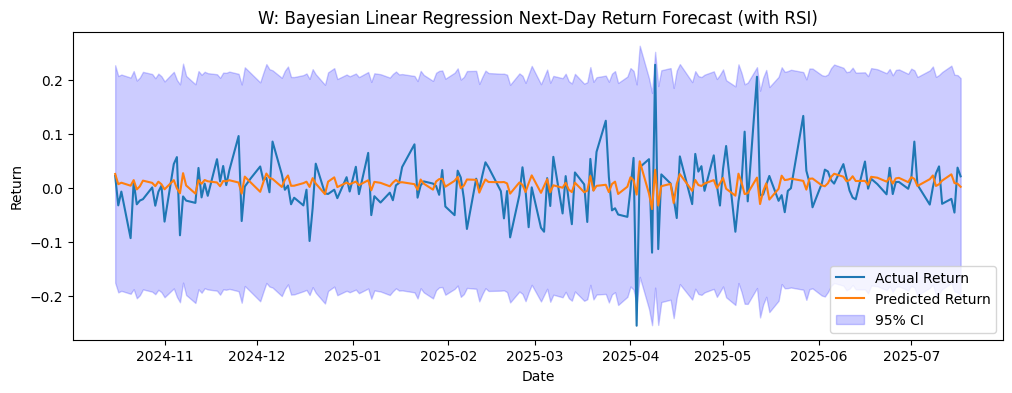

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['P']: YFPricesMissingError('possibly delisted; no price data found  (period=200d)')


W | 2025-07-17 | Predicted Return: 0.0020 | 95% CI: [-0.1998, 0.2039] | Advice: HOLD
Not enough data for P


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['P']: YFPricesMissingError('possibly delisted; no price data found  (period=200d)')


Not enough data for P


In [33]:
for t in ticker:
    try:
        forecast_next_day_return(t.upper())
    except Exception as e:
        print(f"Skipping {t.upper()} due to error: {e}")



#### 4. Nonlinear Forecasting with Gaussian Processes (GP)
Gaussian Processes let you model **nonlinear relationships** that simple linear models miss.

**Example**:  
Use a GP to predict future returns from the last _N_ days of returns, and receive:
- A return forecast
- An uncertainty band

In [34]:
def gp_forecast_next_day_return(ticker, period="200d", interval="1d", num_lags=10):
    df = yf.download(ticker, period=period, interval=interval)
    if df.empty or len(df) < num_lags + 1:
        print(f"Not enough data for {ticker}")
        return

    df['Return'] = df['Close'].pct_change()
    df = df.dropna()

    # Make sure we have enough rows after dropna
    if len(df) < num_lags + 1:
        print(f"⚠️ Not enough usable return data for GP on {ticker}")
        return

    # Create lagged features: Return_t-N, ..., Return_t-1
    for lag in range(1, num_lags + 1):
        df[f'Return_lag{lag}'] = df['Return'].shift(lag)

    df = df.dropna()

    # Set up features and target for training
    X = df[[f'Return_lag{i}' for i in range(1, num_lags + 1)]].values
    y = df['Return'].values

    # Use all except last row for training
    X_train, y_train = X[:-1], y[:-1]
    X_test = X[-1:].reshape(1, -1)  # The most recent pattern

    # GP prediction
    pred_mean, pred_var = gp_predict(
        X_train, y_train, X_test,
        noise_var=1e-4,
        kernel_func=rbf_kernel,
        length_scale=1.0,
        variance=1.0
    )

    pred_std = np.sqrt(pred_var[0])
    lower = pred_mean[0] - 2 * pred_std
    upper = pred_mean[0] + 2 * pred_std

    print(f"📈 {ticker} | {df.index[-1].date()} | GP Predicted Return: {pred_mean[0]:.4f}")
    print(f"   95% Confidence Interval: [{lower:.4f}, {upper:.4f}]")

    # Simple rule-based advice
    if lower > 0:
        advice = "BUY"
    elif upper < 0:
        advice = "SELL"
    else:
        advice = "HOLD"

    print(f"🧠 Advice based on GP: {advice}")

    # Plot the GP training fit
    plt.figure(figsize=(12, 4))
    plt.plot(df.index[:-1], y_train, label="Actual Return")
    plt.axhline(pred_mean[0], color='orange', linestyle='--', label='GP Forecast')
    plt.fill_between([df.index[-1]], lower, upper, color='blue', alpha=0.2, label='95% CI')
    plt.title(f"{ticker} GP Forecast for Next-Day Return")
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.legend()
    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed


📈 W | 2025-07-17 | GP Predicted Return: 0.0399
   95% Confidence Interval: [0.0285, 0.0514]
🧠 Advice based on GP: BUY


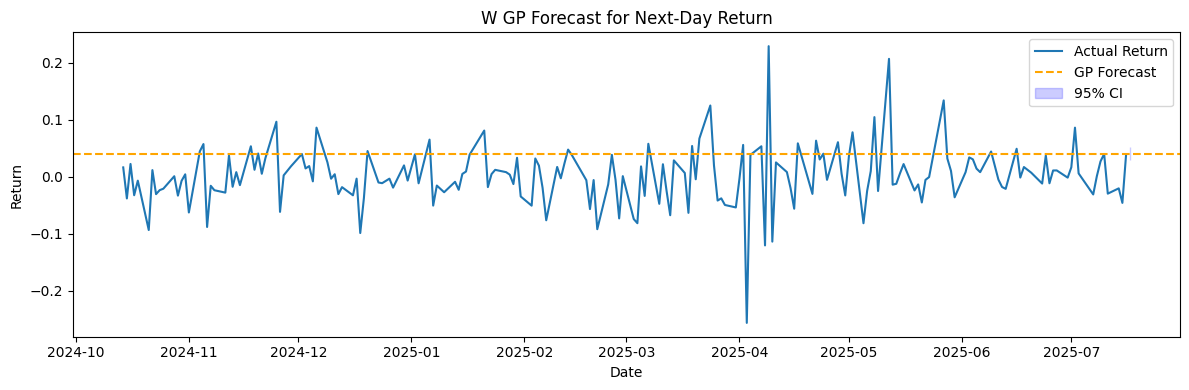

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['P']: YFPricesMissingError('possibly delisted; no price data found  (period=200d)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['P']: YFPricesMissingError('possibly delisted; no price data found  (period=200d)')


Not enough data for P
Not enough data for P


In [35]:
for t in ticker:
    try:
        gp_forecast_next_day_return(t.upper())
    except Exception as e:
        print(f"Skipping {t.upper()} due to error: {e}")

#### 5. Risk Management & Position Sizing
Use the **posterior variance** to manage risk:
- Take larger positions when your model is confident
- Reduce size when uncertainty is high


## Chapter 4: Feedforward Neural Networks

Exercise 4.1
Show that substituting

∇ij Ik =

Xj , i = k,
0, i = k,

into Eq. 4.47 gives

∇ij σk ≡ ∂σk
∂wij
= ∇iσkXj = σk(δki − σi)Xj .

Exercise 4.2
Show that substituting the derivative of the softmax function w.r.t. wij into Eq. 4.52
gives for the special case when the output is Yk = 1, k = i, and Yk = 0, ∀k = i: 
∇ijL(W, b) := [∇W L(W, b)]ij =

(σi − 1)Xj , Yi = 1,
0, Yk = 0, ∀k = i.

Exercise 4.3
Consider feedforward neural networks constructed using the following two types of
activation functions:
– Identity

I d(x) := x
– Step function (a.k.a. Heaviside function)
H (x) := 2
1 if x ≥ 0,
0 otherwise.

1. Consider a feedforward neural network with one input x ∈ R, a single hidden
layer with K units having step function activations, H (x), and a single output
with identity (a.k.a. linear) activation, I d(x). The output can be written as

f (x) ˆ = I d ,
b(2) +
K
k=1
w(2)
k H (b(1)
k + w(1)
k x)-
.
Construct neural networks using these activation functions.
a. Consider the step function

u(x; a) := yH (x − a) =
2
y, if x ≥ a,
0, otherwise.

Construct a neural network with one input x and one hidden layer, whose
response is u(x; a). Draw the structure of the neural network, specify the
activation function for each unit (either I d or H), and specify the values for
all weights (in terms of a and y).
b. Now consider the indicator function
1[a,b)(x) =
2
1, if x ∈ [a, b),
0, otherwise.

Construct a neural network with one input x and one hidden layer, whose
response is y1[a,b)(x), for given real values y, a and b. Draw the structure of
the neural network, specify the activation function for each unit (either I d or
H), and specify the values for all weights (in terms of a, b and y).

Exercise 4.4
A neural network with a single hidden layer can provide an arbitrarily close
approximation to any 1-dimensional bounded smooth function. This question will
guide you through the proof. Let f (x) be any function whose domain is [C,D), for
real values C<D. Suppose that the function is Lipschitz continuous, that is,

∀x, x ∈ [C, D), |f (x

) − f (x)| ≤ L|x − x|,

for some constant L ≥ 0. Use the building blocks constructed in the previous part
to construct a neural network with one hidden layer that approximates this function
within  > 0, that is, ∀x ∈ [C, D), |f (x) − f (x) ˆ | ≤ , where f (x) ˆ is the output of
your neural network given input x. Your network should use only the identity or the
Heaviside activation functions. You need to specify the number K of hidden units,
the activation function for each unit, and a formula for calculating each weight w0,
wk, w(k)
0 , and w(k)
1 , for each k ∈ {1,...,K}. These weights may be specified in
terms of C, D, L, and , as well as the values of f (x) evaluated at a finite number
of x values of your choosing (you need to explicitly specify which x values you
use). You do not need to explicitly write the f (x) ˆ function. Why does your network
attain the given accuracy ?

Exercise 4.5
Consider a shallow neural network regression model with n tanh activated units in
the hidden layer and d outputs. The hidden-outer weight matrix W(2)
ij = 1
n and
the input-hidden weight matrix W(1) = 1. The biases are zero. If the features,
X1,...,Xp are i.i.d. Gaussian random variables with mean μ = 0, variance σ2,
show that
a. Yˆ ∈ [−1, 1].
b. Yˆ is independent of the number of hidden units, n ≥ 1.
c. The expectation, E[Yˆ] = 0, and the variance V[Yˆ] ≤ 1.

Exercise 4.6
Determine the VC dimension of the sum of indicator functions where  = [0, 1]
Fk(x) = {f :  → {0, 1}, f (x) = 
k
i=0
1x∈[t2i,t2i+1), 0 ≤ t0 < ··· < t2k+1 ≤ 1, k ≥ 1}.

Exercise 4.7
Show that a feedforward binary classifier with two Heaviside activated units shatters
the data {0.25, 0.5, 0.75}.

Exercise 4.8
Compute the weight and bias updates of W(2) and b(2) given a shallow binary
classifier (with one hidden layer) with unit weights, zero biases, and ReLU
activation of two hidden units for the labeled observation (x = 1, y = 1).

Exercise 4.9
Consider the following dataset (taken from Anscombe’s quartet):
(x1, y1) = (10.0, 9.14), (x2, y2) = (8.0, 8.14), (x3, y3) = (13.0, 8.74),
(x4, y4) = (9.0, 8.77), (x5, y5) = (11.0, 9.26), (x6, y6) = (14.0, 8.10),
(x7, y7) = (6.0, 6.13), (x8, y8) = (4.0, 3.10), (x9, y9) = (12.0, 9.13),
(x10, y10) = (7.0, 7.26), (x11, y11) = (5.0, 4.74).

a. Use a neural network library of your choice to show that a feedforward network
with one hidden layer consisting of one unit and a feedforward network with
no hidden layers, each using only linear activation functions, do not outperform
linear regression based on ordinary least squares (OLS).
b. Also demonstrate that a neural network with a hidden layer of three neurons
using the tanh activation function and an output layer using the linear activation
function captures the non-linearity and outperforms the linear regression.

Exercise 4.10
Review the Python notebook deep_classifiers.ipynb. This notebook uses
Keras to build three simple feedforward networks applied to the half-moon problem:
a logistic regression (with no hidden layer); a feedforward network with one

hidden layer; and a feedforward architecture with two hidden layers. The half-
moons problem is not linearly separable in the original coordinates. However you

will observe—after plotting the fitted weights and biases—that a network with
many hidden neurons gives a linearly separable representation of the classification
problem in the coordinates of the output from the final hidden layer.
Complete the following questions in your own words.
a. Did we need more than one hidden layer to perfectly classify the half-moons
dataset? If not, why might multiple hidden layers be useful for other datasets?
b. Why not use a very large number of neurons since it is clear that the classification
accuracy improves with more degrees of freedom?
c. Repeat the plotting of the hyperplane, in Part 1b of the notebook, only without the
ReLU function (i.e., activation=“linear”). Describe qualitatively how the decision
surface changes with increasing neurons. Why is a (non-linear) activation
function needed? The use of figures to support your answer is expected.

Exercise 4.11
Using the EarlyStopping callback in Keras, modify the notebook
Deep_Classifiers.ipynb to terminate training under the following stopping
criterion |L(k+1) − L(k)| ≤ δ with δ = 0.1.

Exercise 4.12***
Consider a feedforward neural network with three inputs, two units in the first
hidden layer, two units in the second hidden layer, and three units in the output layer.
The activation function for hidden layer 1 is ReLU, for hidden layer 2 is sigmoid,
and for the output layer is softmax.
The initial weights are given by the matrices
W(1) =
)
0.1 0.3 0.7
0.9 0.4 0.4
*
, W(2) =
)
0.4 0.3
0.7 0.2
*
, W(3) =
⎛
⎝
0.5 0.6
0.6 0.7
0.3 0.2
⎞
⎠ ,

and all the biases are unit vectors.
Assuming that the input &
0.1 0.7 0.3
'
corresponds to the output &
100'

, man-
ually compute the updated weights and biases after a single epoch (forward +

backward pass), clearly stating all derivatives that you have used. You should use a
learning rate of 1.
As a practical exercise, you should modify the implementation of a stochastic
gradient descent routine in the back-propagation Python notebook.
Note that the notebook example corresponds to the example in Sect. 5, which
uses sigmoid activated hidden layers only. Compare the weights and biases obtained
by TensorFlow (or your ANN library of choice) with those obtained by your
procedure after 200 epochs.